# TSLA Price Prediction

## 1. Introduction

### Description

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegressionCV, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


#from datetime import date

In [2]:
# To ignore the warning messages
warnings.filterwarnings('ignore')

### Reading Data and Checking Data Characteristics

In [3]:
# Read data into data frames
# df = pd.read_csv('/Users/johnvincent/Desktop/usd_ADS/github/ADS-505-Group6-2023/TSLA_preprocessed.csv')
df = pd.read_csv('TSLA_preprocessed.csv')


In [4]:
df.head()

,Date,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,Volume_TSLA,EPS_qtr,Revenue,oper_cash_fl,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,3/11/22,280.066681,281.266663,264.589996,265.116669,265.116669,67037100,0.68,17719000000,4585000000,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,3/14/22,260.203339,266.899994,252.013336,255.456665,255.456665,71152200,0.68,17719000000,4585000000,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,3/15/22,258.423340,268.523346,252.190002,267.296661,267.296661,66841200,0.68,17719000000,4585000000,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,3/16/22,269.666656,280.666656,267.420013,280.076660,280.076660,84028800,0.68,17719000000,4585000000,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,3/17/22,276.996674,291.666656,275.239990,290.533325,290.533325,66582900,0.68,17719000000,4585000000,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000


In [5]:
df['Date'] = pd.to_datetime(df['Date']) #convert to datetime64 data type
df['Date']

0     2022-03-11
1     2022-03-14
2     2022-03-15
3     2022-03-16
4     2022-03-17
         ...    
375   2023-09-08
376   2023-09-08
377   2023-09-11
378   2023-09-12
379   2023-09-13
Name: Date, Length: 380, dtype: datetime64[ns]

## Add column for day of the week
### '0' is 'Monday' and '4' is 'Friday'. There should be no '5' or '6' due to market close.
#### Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html

In [6]:
df.insert(1, 'day_week', df['Date'].dt.dayofweek)
df

,Date,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,Volume_TSLA,EPS_qtr,Revenue,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,2022-03-11,4,280.066681,281.266663,264.589996,265.116669,265.116669,67037100,0.68,17719000000,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,2022-03-14,0,260.203339,266.899994,252.013336,255.456665,255.456665,71152200,0.68,17719000000,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,2022-03-15,1,258.423340,268.523346,252.190002,267.296661,267.296661,66841200,0.68,17719000000,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,2022-03-16,2,269.666656,280.666656,267.420013,280.076660,280.076660,84028800,0.68,17719000000,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,2022-03-17,3,276.996674,291.666656,275.239990,290.533325,290.533325,66582900,0.68,17719000000,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,118367700,0.78,24927000000,...,13733.17969,13761.53027,13761.53027,4160360000,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3259290000
376,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,118367700,0.78,24927000000,...,13805.12988,13917.88965,13917.88965,4538870000,4480.979980,4490.770020,4467.890137,4487.459961,4487.459961,3369920000
377,2023-09-11,0,264.269989,274.850006,260.609985,273.579987,273.579987,174667900,0.78,24927000000,...,13763.69043,13773.61035,13773.61035,4595490000,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3435740000
378,2023-09-12,1,270.760010,278.390015,266.600006,267.480011,267.480011,135999900,0.78,24927000000,...,13733.82031,13813.58984,13813.58984,4840310000,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3529430000


## Add column on the difference between open and close TSLA price

In [7]:
df.insert(7, 'open_close_TSLA', df.iloc[df.index]['Close_TSLA'] - df.iloc[df.index]['Open_TSLA'])
df

,Date,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,Volume_TSLA,EPS_qtr,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,2022-03-11,4,280.066681,281.266663,264.589996,265.116669,265.116669,-14.950012,67037100,0.68,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,2022-03-14,0,260.203339,266.899994,252.013336,255.456665,255.456665,-4.746674,71152200,0.68,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,2022-03-15,1,258.423340,268.523346,252.190002,267.296661,267.296661,8.873321,66841200,0.68,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,2022-03-16,2,269.666656,280.666656,267.420013,280.076660,280.076660,10.410004,84028800,0.68,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,2022-03-17,3,276.996674,291.666656,275.239990,290.533325,290.533325,13.536651,66582900,0.68,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,118367700,0.78,...,13733.17969,13761.53027,13761.53027,4160360000,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3259290000
376,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,118367700,0.78,...,13805.12988,13917.88965,13917.88965,4538870000,4480.979980,4490.770020,4467.890137,4487.459961,4487.459961,3369920000
377,2023-09-11,0,264.269989,274.850006,260.609985,273.579987,273.579987,9.309998,174667900,0.78,...,13763.69043,13773.61035,13773.61035,4595490000,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3435740000
378,2023-09-12,1,270.760010,278.390015,266.600006,267.480011,267.480011,-3.279999,135999900,0.78,...,13733.82031,13813.58984,13813.58984,4840310000,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3529430000


## Add binary column if
### TSLA closed at or above opening price = 1
### TSLA closed below opening price = 0
#### For future use in logistic regression or classification purposes

In [8]:
df.insert(8, 'positive_TSLA', np.where(df['open_close_TSLA']>=0, 1, 0))
df

,Date,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,2022-03-11,4,280.066681,281.266663,264.589996,265.116669,265.116669,-14.950012,0,67037100,...,12830.37012,12843.80957,12843.80957,5288210000,4279.500000,4291.009766,4200.490234,4204.310059,4204.310059,4938640000
1,2022-03-14,0,260.203339,266.899994,252.013336,255.456665,255.456665,-4.746674,0,71152200,...,12555.34961,12581.21973,12581.21973,5876710000,4202.750000,4247.569824,4161.720215,4173.109863,4173.109863,5574920000
2,2022-03-15,1,258.423340,268.523346,252.190002,267.296661,267.296661,8.873321,1,66841200,...,12616.58984,12948.62012,12948.62012,5440100000,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,5392470000
3,2022-03-16,2,269.666656,280.666656,267.420013,280.076660,280.076660,10.410004,1,84028800,...,12992.20020,13436.54981,13436.54981,6552210000,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,6309750000
4,2022-03-17,3,276.996674,291.666656,275.239990,290.533325,290.533325,13.536651,1,66582900,...,13317.13965,13614.78027,13614.78027,5612090000,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4985090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,0,118367700,...,13733.17969,13761.53027,13761.53027,4160360000,4451.299805,4473.529785,4448.379883,4457.490234,4457.490234,3259290000
376,2023-09-08,4,251.220001,256.519989,246.669998,248.500000,248.500000,-2.720001,0,118367700,...,13805.12988,13917.88965,13917.88965,4538870000,4480.979980,4490.770020,4467.890137,4487.459961,4487.459961,3369920000
377,2023-09-11,0,264.269989,274.850006,260.609985,273.579987,273.579987,9.309998,1,174667900,...,13763.69043,13773.61035,13773.61035,4595490000,4473.270020,4487.109863,4456.830078,4461.899902,4461.899902,3435740000
378,2023-09-12,1,270.760010,278.390015,266.600006,267.480011,267.480011,-3.279999,0,135999900,...,13733.82031,13813.58984,13813.58984,4840310000,4462.649902,4479.390137,4453.520020,4467.439941,4467.439941,3529430000


In [9]:
df.shape # Check the data dimension

(380, 31)

In [10]:
df.columns # Get attribute names

Index(['Date', 'day_week', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'open_close_TSLA', 'positive_TSLA', 'Volume_TSLA',
       'EPS_qtr', 'Revenue', 'oper_cash_fl', 'gross_mrgn', 'oper_mrgn',
       'net_mrgn', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ',
       'High_NDQ', 'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ',
       'Open_SPX', 'High_SPX', 'Low_SPX', 'Close_SPX', 'Adj_Close_SPX',
       'Volume_SPX'],
      dtype='object')

In [11]:
df.info() # Check data characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             380 non-null    datetime64[ns]
 1   day_week         380 non-null    int64         
 2   Open_TSLA        380 non-null    float64       
 3   High_TSLA        380 non-null    float64       
 4   Low_TSLA         380 non-null    float64       
 5   Close_TSLA       380 non-null    float64       
 6   Adj_Close_TSLA   380 non-null    float64       
 7   open_close_TSLA  380 non-null    float64       
 8   positive_TSLA    380 non-null    int32         
 9   Volume_TSLA      380 non-null    int64         
 10  EPS_qtr          380 non-null    float64       
 11  Revenue          380 non-null    int64         
 12  oper_cash_fl     380 non-null    int64         
 13  gross_mrgn       380 non-null    float64       
 14  oper_mrgn        380 non-null    float64  

## 2. Exploratory Data Analysis

### Checking Missing Values

In [12]:
df.isnull().sum() # Checking Null Values

Date               0
day_week           0
Open_TSLA          0
High_TSLA          0
Low_TSLA           0
Close_TSLA         0
Adj_Close_TSLA     0
open_close_TSLA    0
positive_TSLA      0
Volume_TSLA        0
EPS_qtr            0
Revenue            0
oper_cash_fl       0
gross_mrgn         0
oper_mrgn          0
net_mrgn           0
pe_ann             0
pe_qtr             0
fed_funds_rate     0
Open_NDQ           0
High_NDQ           0
Low_NDQ            0
Close_NDQ          0
Adj Close_NDQ      0
Volume_NDQ         0
Open_SPX           0
High_SPX           0
Low_SPX            0
Close_SPX          0
Adj_Close_SPX      0
Volume_SPX         0
dtype: int64

0 NaN values in the dataframe

### Checking duplicated Values

In [13]:
df.duplicated().sum()

0

0 duplicated values in the dataframe

### Understanding of price range categories

In [14]:
df.nunique() #check cardinality to see if variable type fits

Date               379
day_week             5
Open_TSLA          375
High_TSLA          373
Low_TSLA           375
Close_TSLA         377
Adj_Close_TSLA     377
open_close_TSLA    372
positive_TSLA        2
Volume_TSLA        379
EPS_qtr              6
Revenue              7
oper_cash_fl         7
gross_mrgn           6
oper_mrgn            7
net_mrgn             7
pe_ann             378
pe_qtr             378
fed_funds_rate      12
Open_NDQ           380
High_NDQ           380
Low_NDQ            380
Close_NDQ          380
Adj Close_NDQ      380
Volume_NDQ         380
Open_SPX           380
High_SPX           378
Low_SPX            379
Close_SPX          379
Adj_Close_SPX      379
Volume_SPX         380
dtype: int64

In [15]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
columns = ['Date', 'day_week', 'Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA', 'open_close_TSLA', 'positive_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
       'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #32 columns

tesla = ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA',
       'Adj_Close_TSLA','open_close_TSLA', 'positive_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
       'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',] #16 columns

nasdaq = ['Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
       'Adj Close_NDQ', 'Volume_NDQ'] #6 columns

spx = ['Open_SPX', 'High_SPX', 'Low_SPX',
       'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'] #6 columns

# Data Visualization: Analyzing the Relationship Between Variables

In [16]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 15-by-2 grid of subplots to display

# COMMENTING OUT ONLY TO SPEED ANALYSIS. UNCOMMENT FOR FINAL PRODUCT.

#fig, ax = plt.subplots(15,2, figsize=(50,50))

#target = 'Close_TSLA'

# FOR loop that iterates through each feature in the "columns" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
#for var, subplot in zip(columns, ax.flatten()):
#    sns.boxplot(x=var, y=target, data=df, ax=subplot)
#    plt.xticks(rotation=45)
#plt.show()

## Explore relationship between P/E ratio and US Federal Reserve Discount Rate

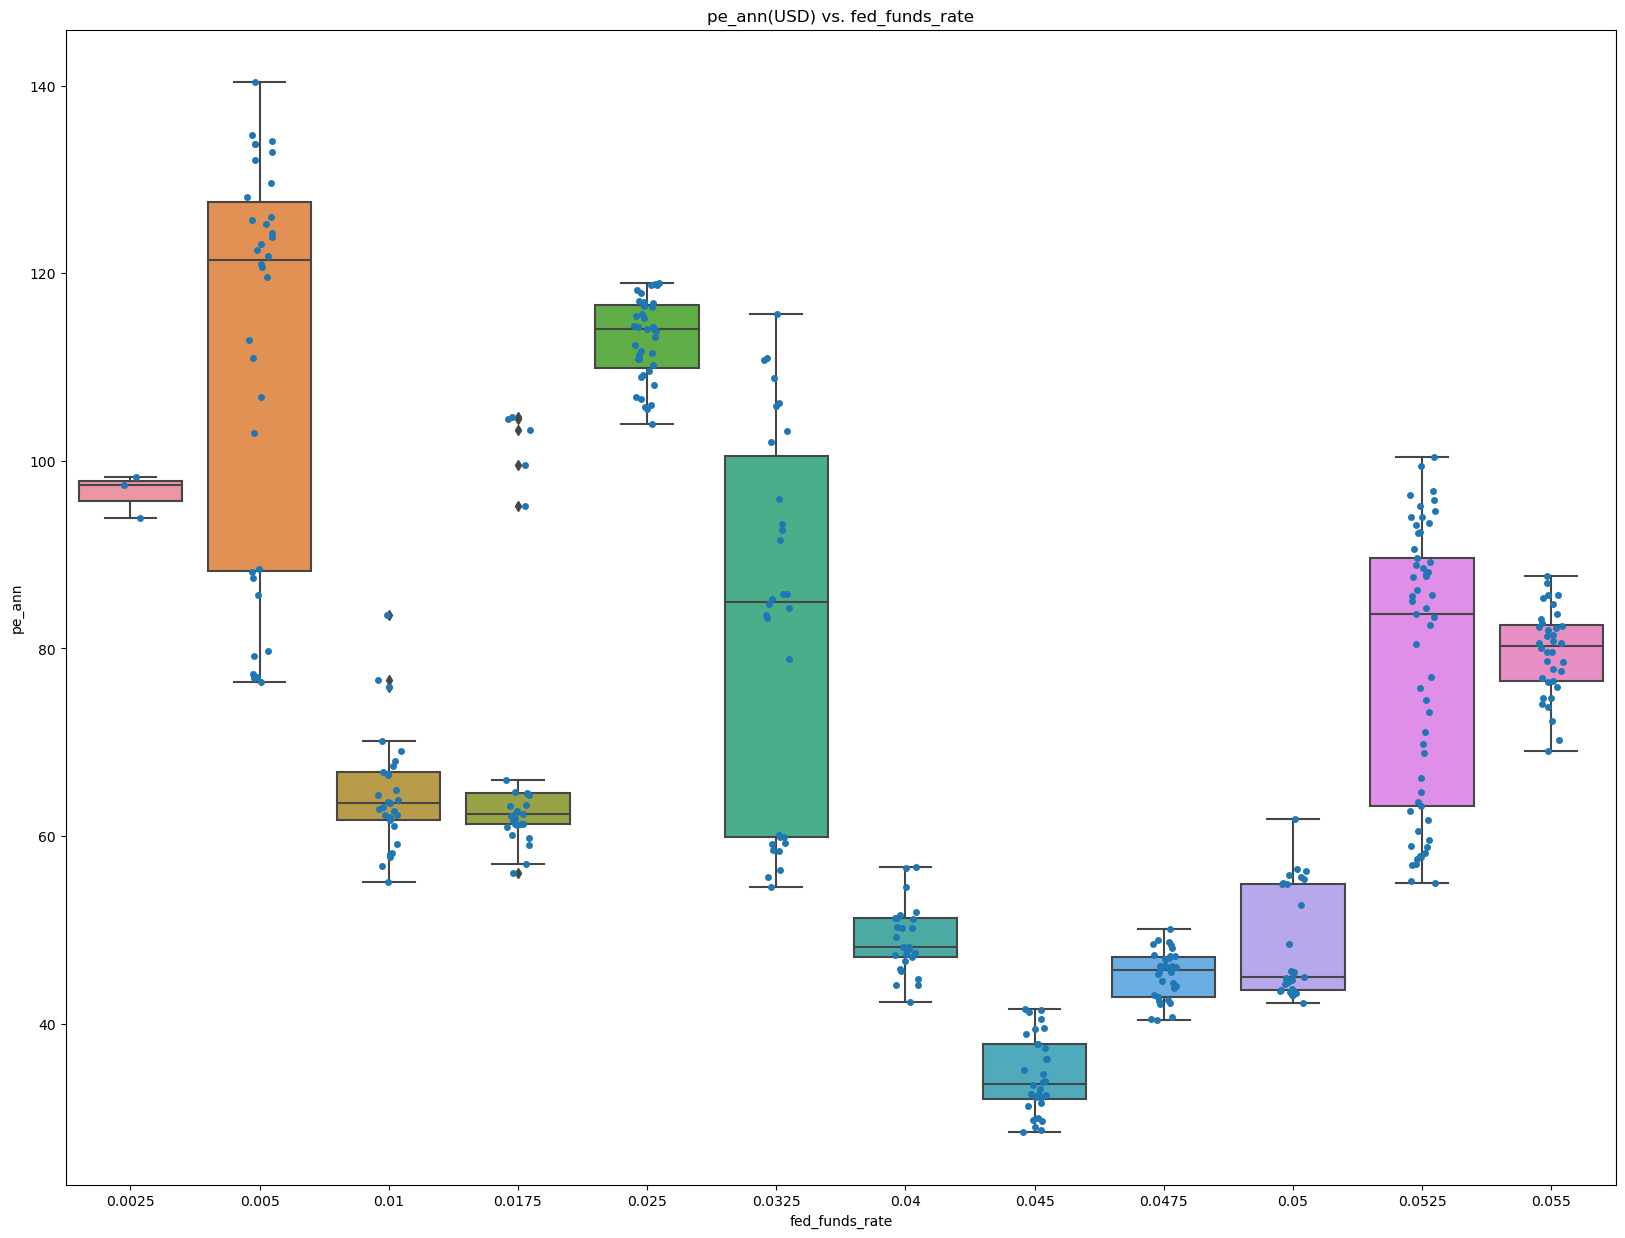

In [17]:
target_y = 'pe_ann'
column_x = 'fed_funds_rate'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

## Explore relationship between price and the day of the week

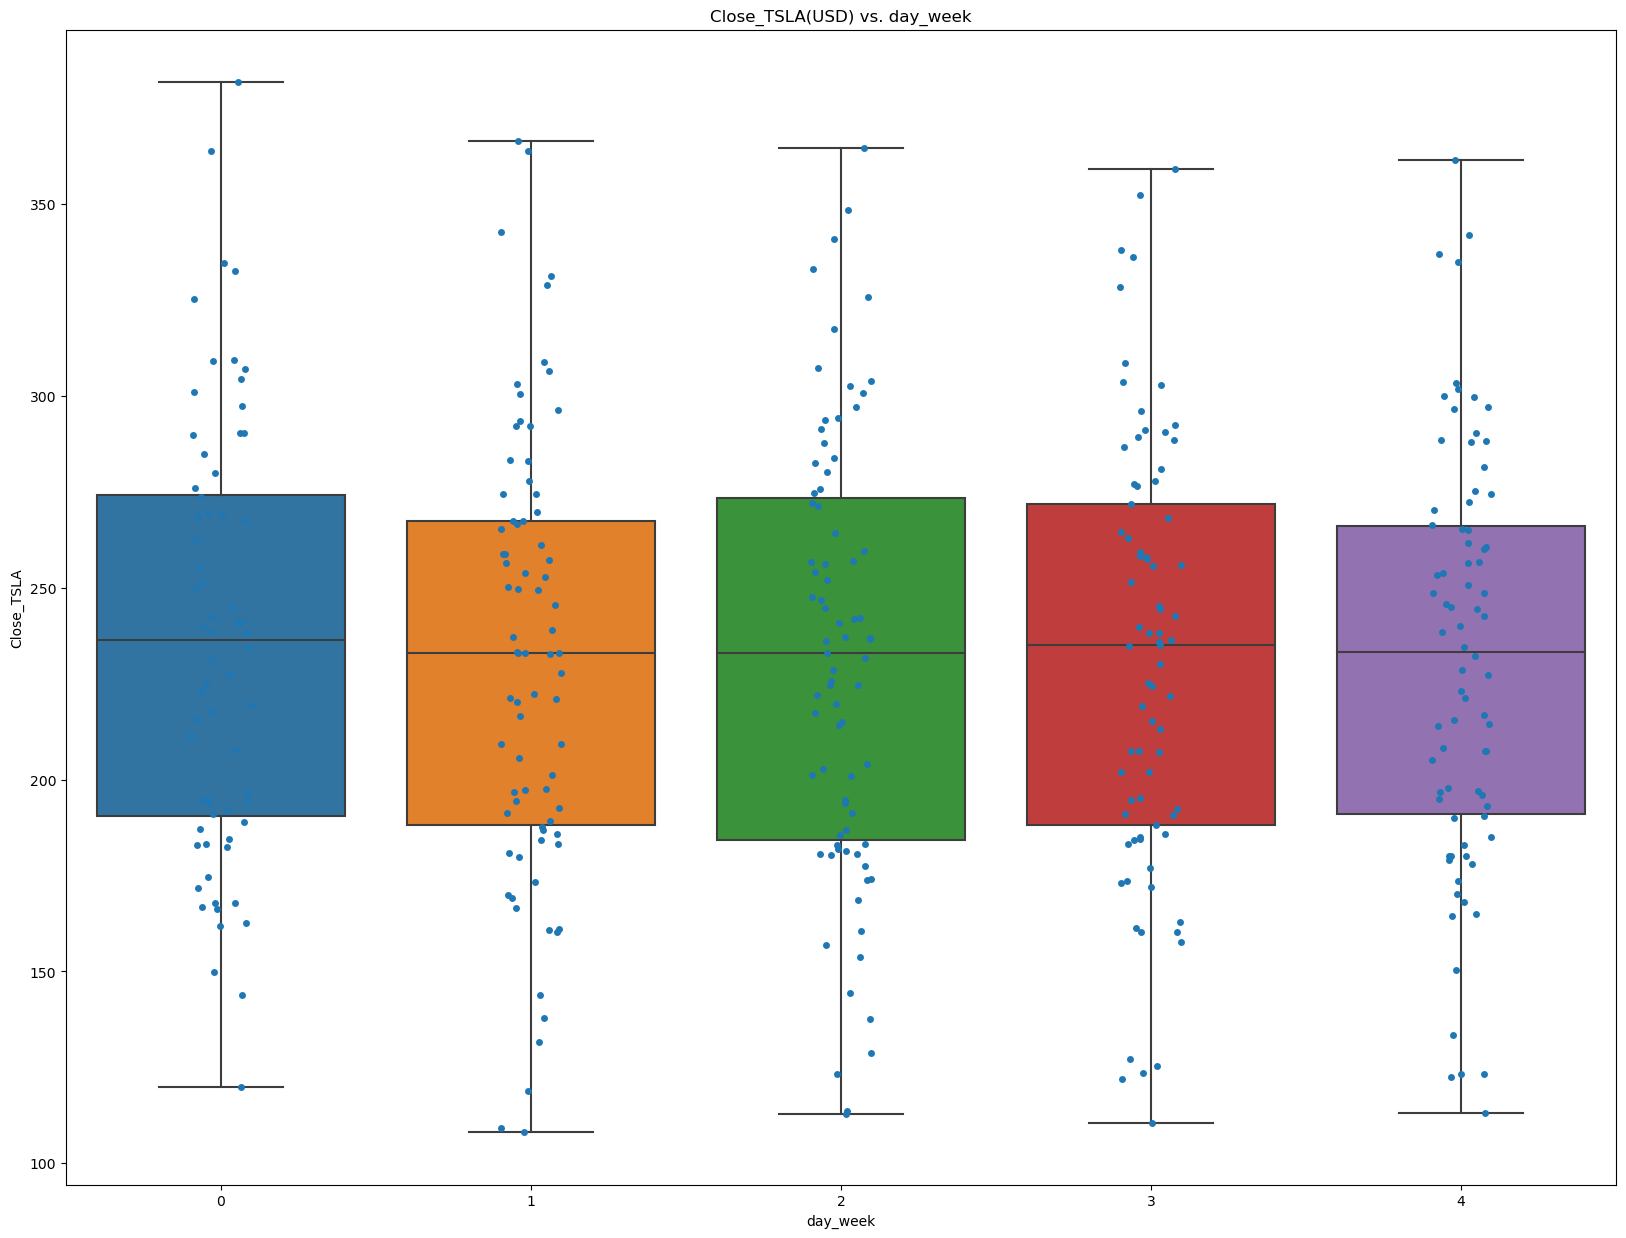

In [18]:
target_y = 'Close_TSLA'
column_x = 'day_week'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

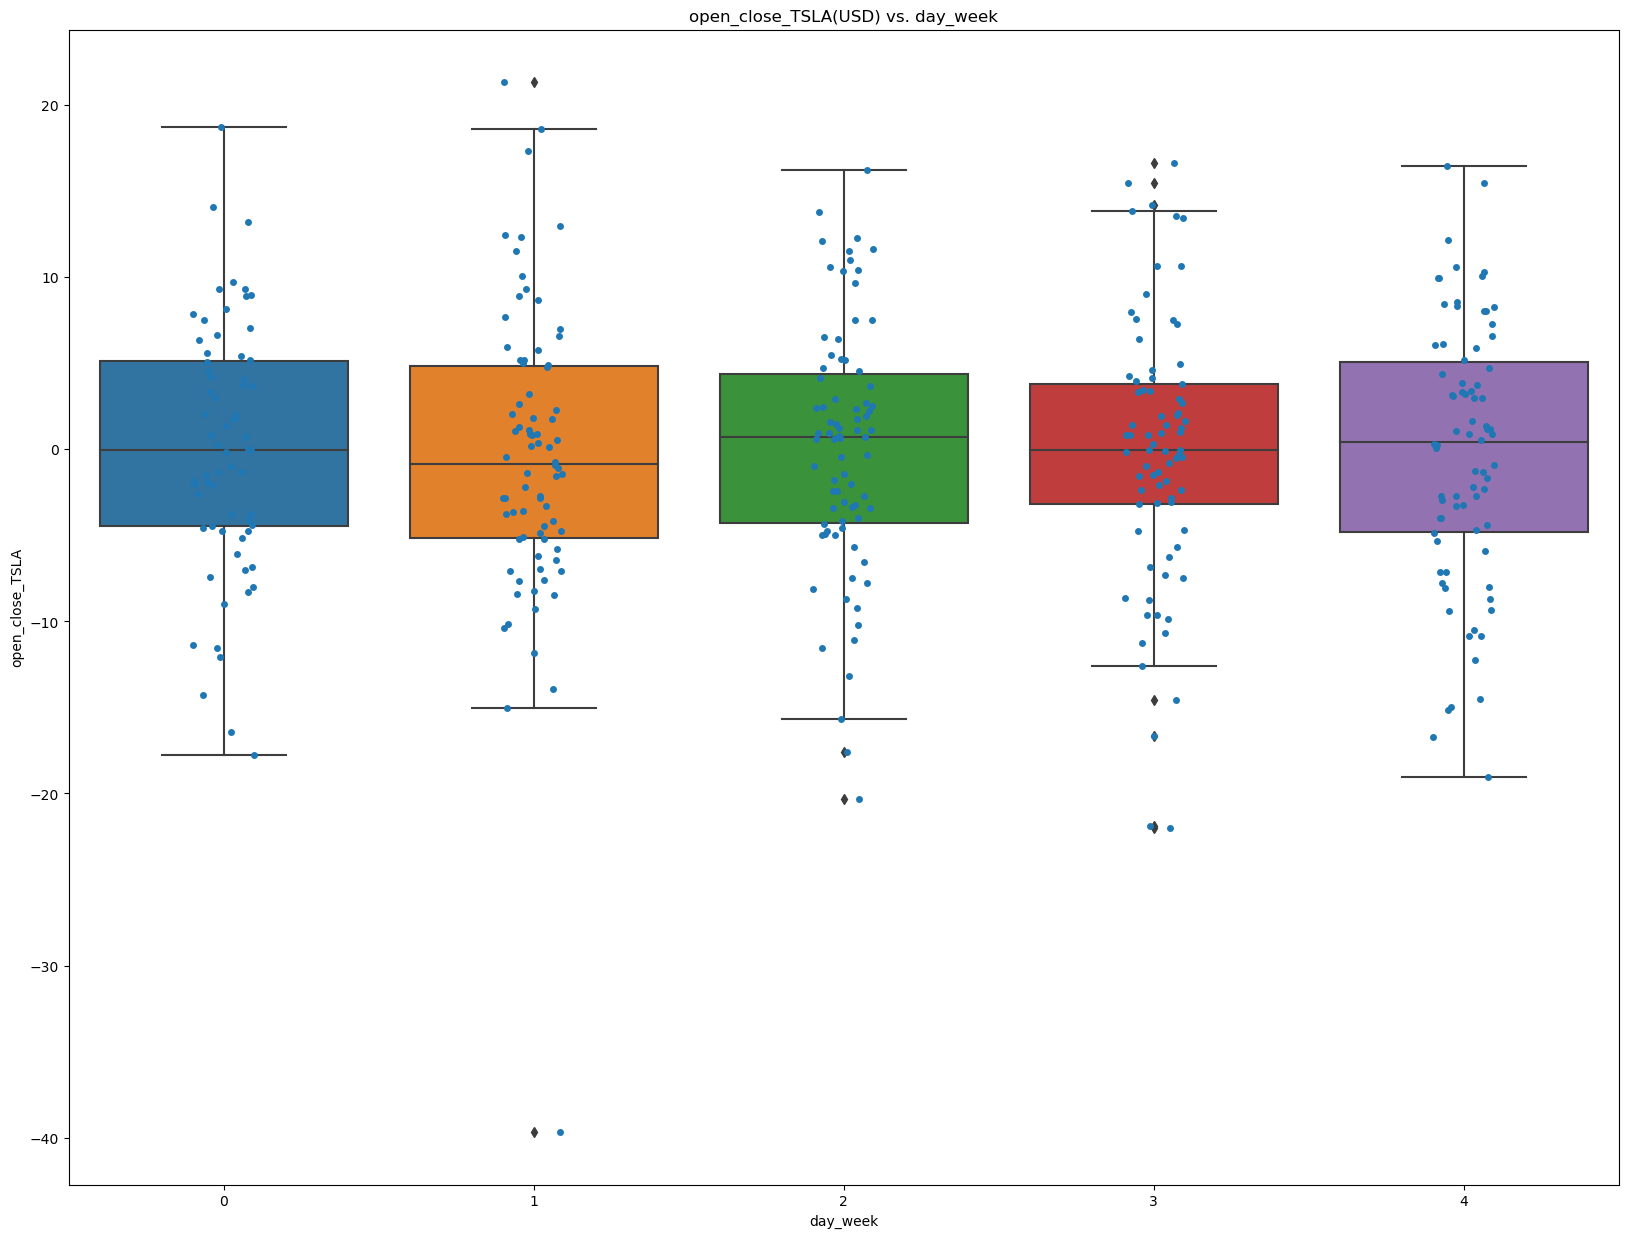

In [19]:
target_y = 'open_close_TSLA'
column_x = 'day_week'

plt.figure(figsize=(20, 15))
sns.boxplot(x=column_x, y=target_y, data=df)
sns.stripplot(x=column_x, y=target_y, data=df, jitter=True)
plt.title(target_y + "(USD) vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.show()

### Statistics on the open-close TSLA column by day of the week

In [20]:
day_week_stats = df.groupby('day_week').describe().transpose()
day_week_stats.loc['open_close_TSLA']

day_week,0,1,2,3,4
count,68.000000,78.000000,79.000000,77.000000,78.000000
mean,-0.018677,-0.473930,0.029958,-0.209610,-0.269958
std,7.253562,8.599311,7.299539,7.823672,7.671168
min,-17.759995,-39.669983,-20.333328,-21.983337,-19.019990
25%,-4.479168,-5.168335,-4.269997,-3.179993,-4.812504
50%,-0.025009,-0.834992,0.716660,-0.036667,0.415001
75%,5.107502,4.852505,4.339996,3.760010,5.092506
max,18.690003,21.326660,16.226685,16.599991,16.449982


### Use a FOR loop to run analyze P/E Ratio vs. the 'tesla' variable set (defined above)

In [21]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 16-by-1 grid of subplots to display

# COMMENTING OUT ONLY TO SPEED ANALYSIS. UNCOMMENT FOR FINAL PRODUCT.

#fig, ax = plt.subplots(16,1, figsize=(15,210))

#target = 'pe_ann'

#plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "categorical" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
#for var, subplot in zip(tesla, ax.flatten()):
#    sns.boxplot(x=var, y=target, data=df, ax=subplot)
#plt.show()

### Additional EDA to find other relationships that might serve as predictors

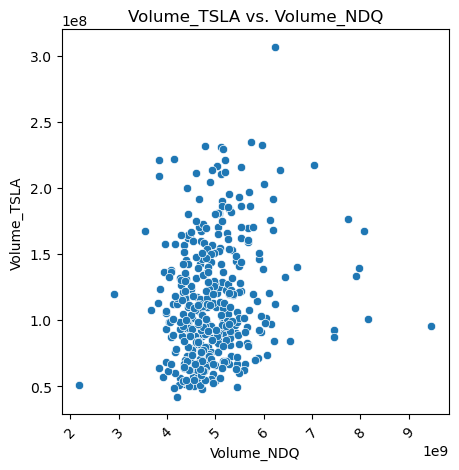

In [22]:
target_y = 'Volume_TSLA'
column_x = 'Volume_NDQ'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

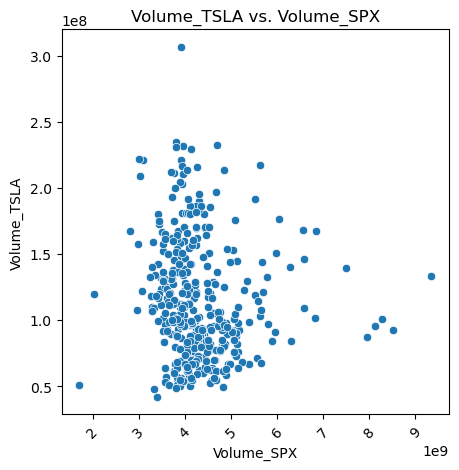

In [23]:
target_y = 'Volume_TSLA'
column_x = 'Volume_SPX'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

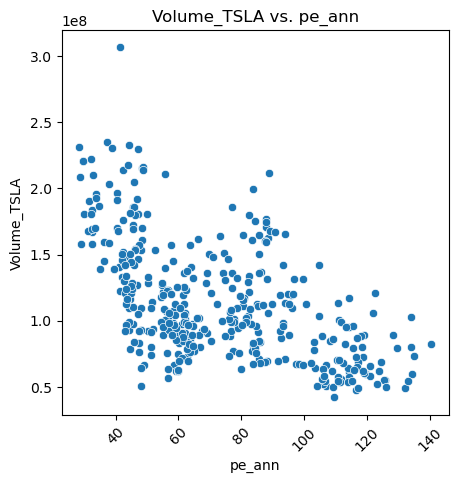

In [24]:
target_y = 'Volume_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(5,5))
sns.scatterplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

### Investigate TSLA's closing price against the 'nasdaq' variable set (above)

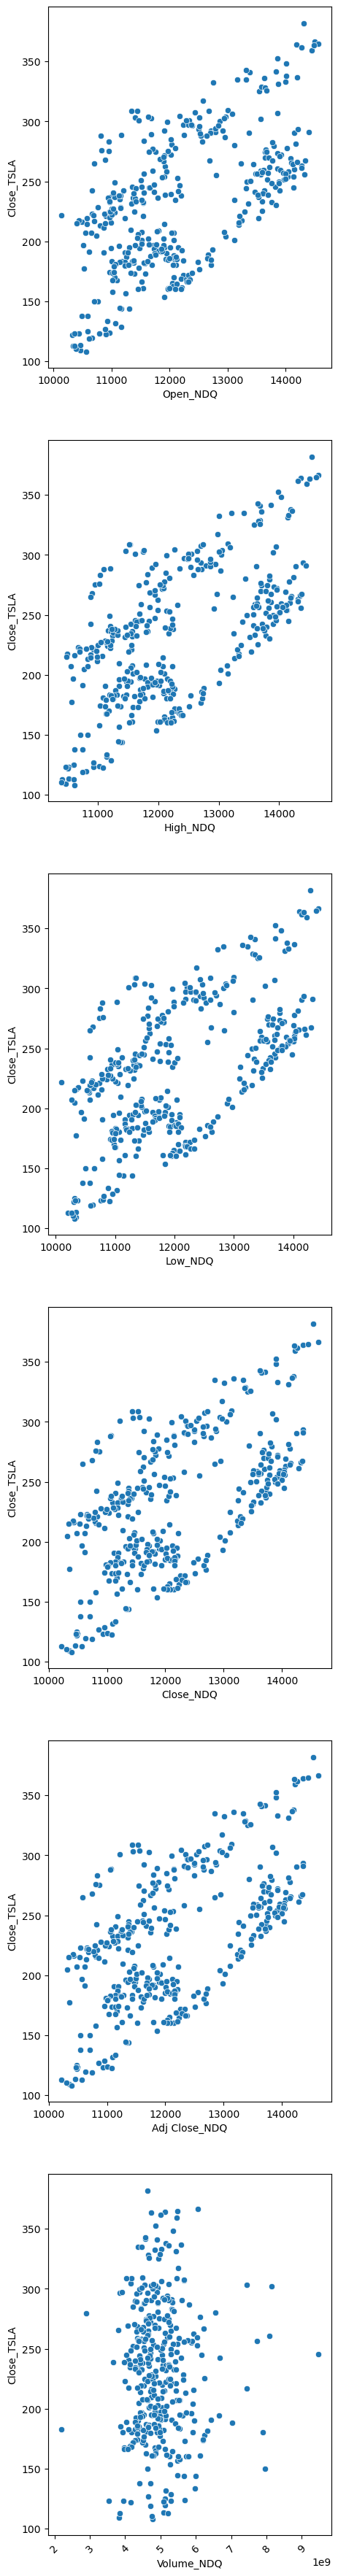

In [25]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Generate a 6-by-1 grid of subplots to display
fig, ax = plt.subplots(6,1, figsize=(5,45))

target = 'Close_TSLA'

plt.xticks(rotation=45)

# FOR loop that iterates through each feature in the "nominal" set and zips it into a tuple with a subplot
# Each subplot uses each feature and plots the respective feature as a boxplot measuring price range.
for var, subplot in zip(nasdaq, ax.flatten()):
    sns.scatterplot(x=var, y=target, data=df, ax=subplot)
plt.show()

### Heatmap of correlation values by feature

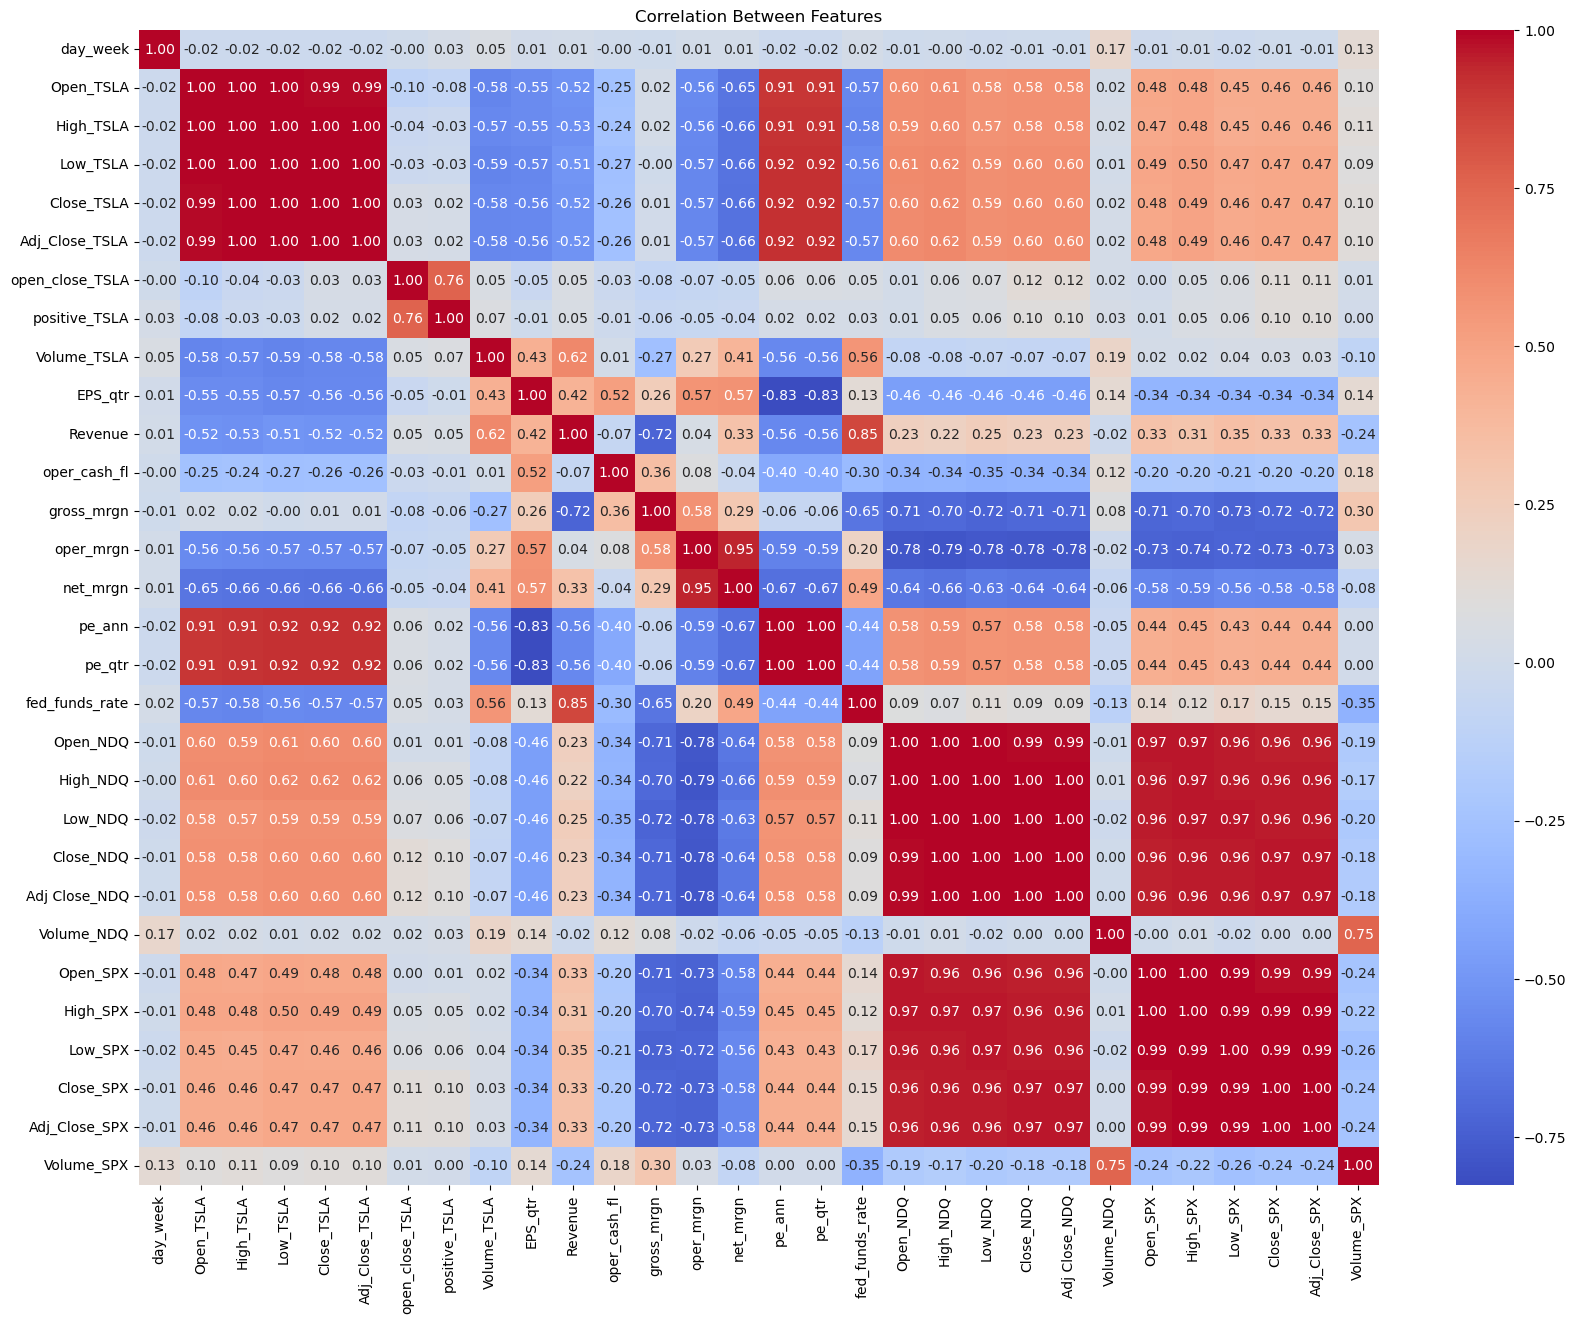

In [26]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws=None)
plt.title('Correlation Between Features')
plt.show()

### Display highest correlations between target and the other features in our dataset



In [27]:
df.corr().abs()['open_close_TSLA'].sort_values(ascending=False)

open_close_TSLA    1.000000
positive_TSLA      0.764211
Adj Close_NDQ      0.115798
Close_NDQ          0.115798
Close_SPX          0.111286
Adj_Close_SPX      0.111286
Open_TSLA          0.102563
gross_mrgn         0.080839
Low_NDQ            0.068830
oper_mrgn          0.067029
Low_SPX            0.061890
High_NDQ           0.058220
pe_ann             0.055624
pe_qtr             0.055624
net_mrgn           0.054955
Volume_TSLA        0.053045
Revenue            0.051464
fed_funds_rate     0.050581
High_SPX           0.050329
EPS_qtr            0.048268
High_TSLA          0.042456
oper_cash_fl       0.034188
Adj_Close_TSLA     0.033831
Close_TSLA         0.033831
Low_TSLA           0.028370
Volume_NDQ         0.015990
Volume_SPX         0.010348
Open_NDQ           0.010313
day_week           0.003698
Open_SPX           0.002230
Name: open_close_TSLA, dtype: float64

### Key Variables Visualizations

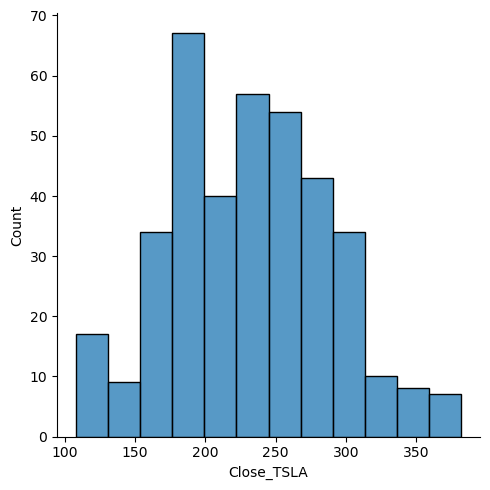

In [28]:
sns.displot(df, x='Close_TSLA')

<Figure size 1200x5600 with 0 Axes>

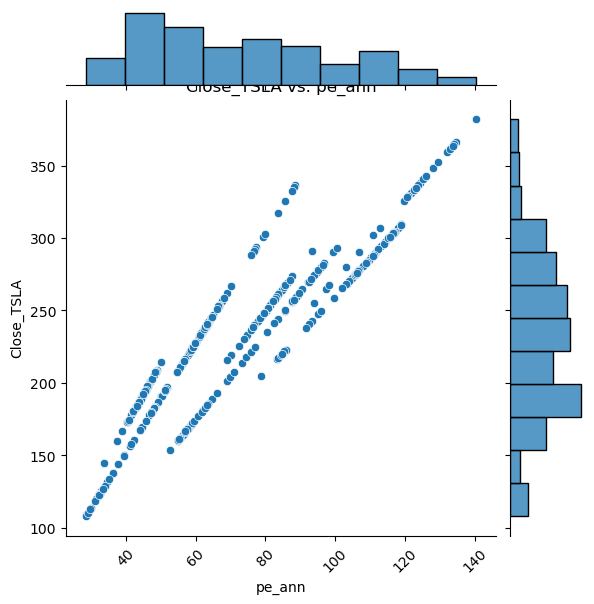

In [29]:
target_y = 'Close_TSLA'
column_x = 'pe_ann'

plt.figure(figsize=(12, 56))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

## DISPLOT of variables broken down by US Federal discount rate

<Figure size 1200x5600 with 0 Axes>

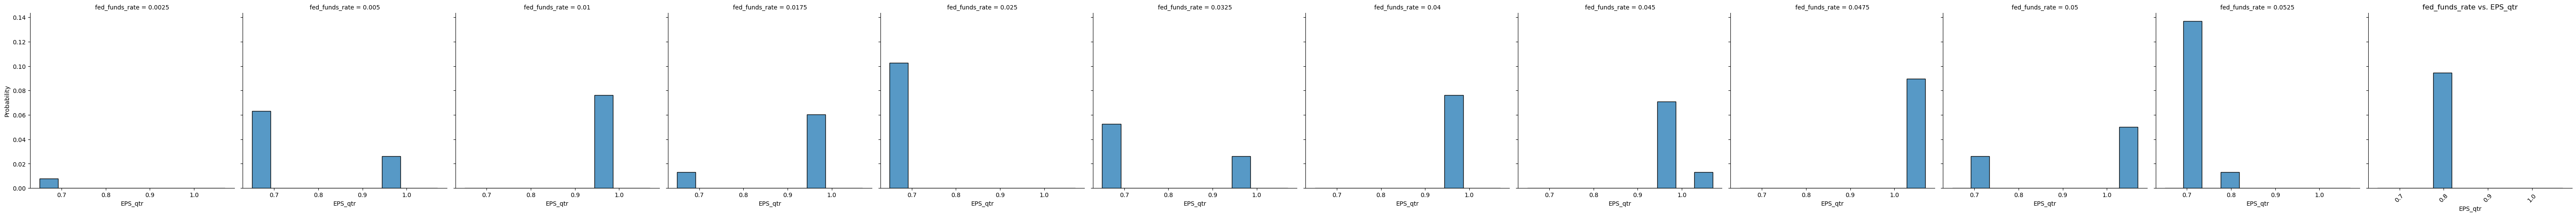

In [30]:
target_y = 'fed_funds_rate'
column_x = 'EPS_qtr'

plt.figure(figsize=(12, 56))
sns.displot(x=column_x, col=target_y, data=df, stat="probability")
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

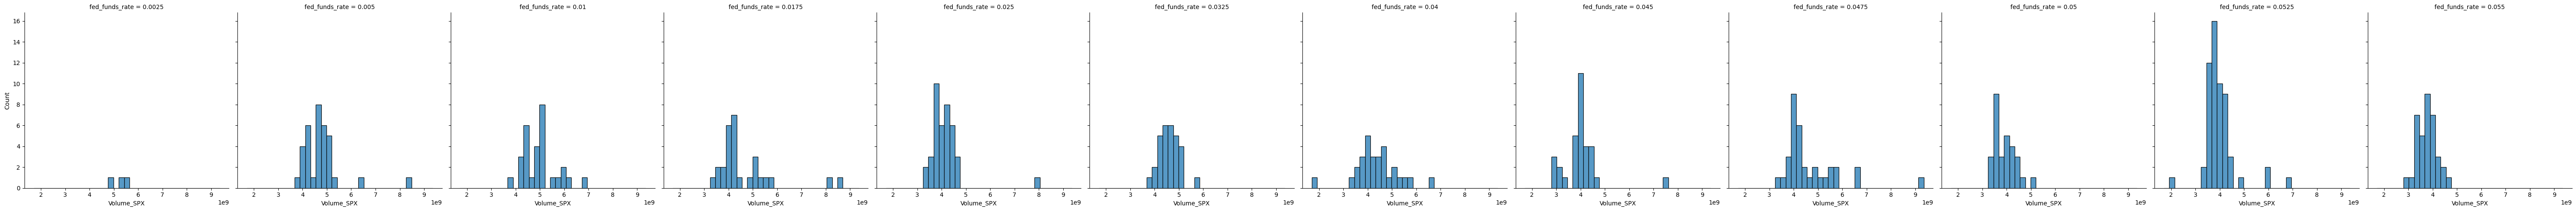

In [31]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_SPX", col="fed_funds_rate")


### S&P 500 vs. TSLA's P/E ratio (annualized EPS)

<Figure size 1e+06x1e+06 with 0 Axes>

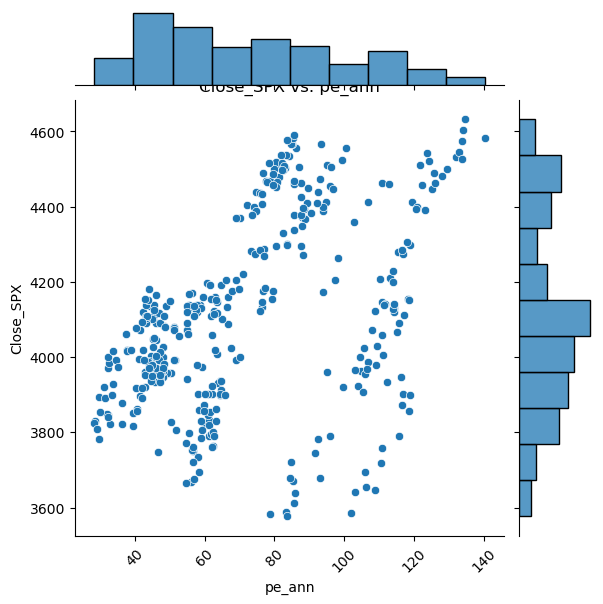

In [32]:
target_y = 'Close_SPX'
column_x = 'pe_ann'

plt.figure(figsize=(10000, 10000))
sns.jointplot(x=column_x, y=target_y, data=df)
plt.title(target_y + " vs. " + column_x)
plt.xlabel(column_x)
plt.ylabel(target_y)
plt.xticks(rotation=45)
plt.show()

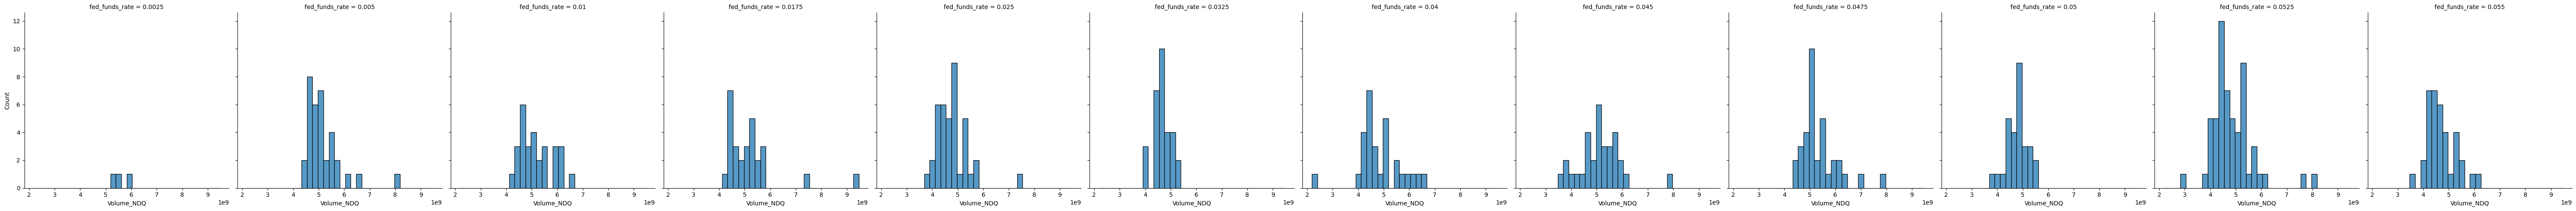

In [33]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_NDQ", col="fed_funds_rate")

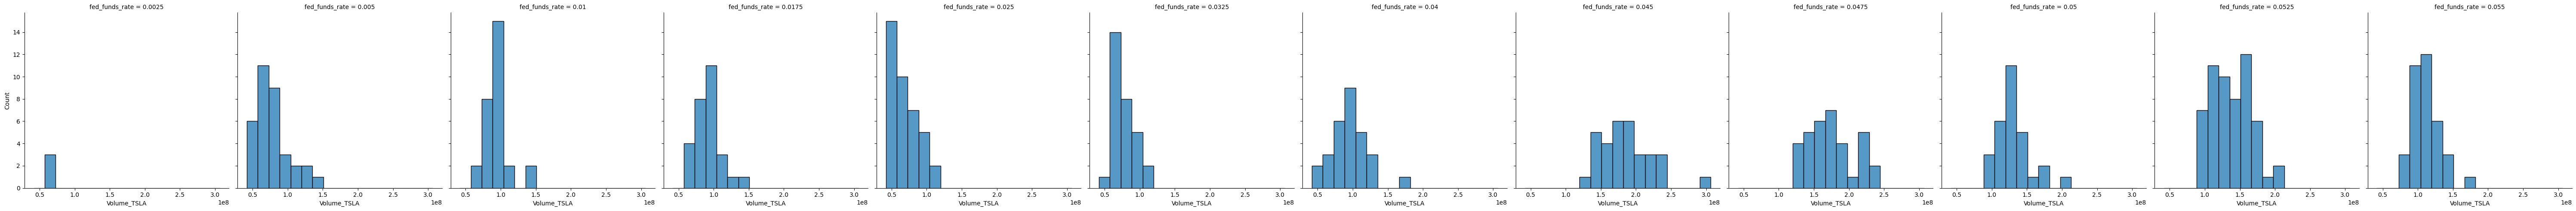

In [34]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
sns.displot(data = df, x="Volume_TSLA", col="fed_funds_rate")

# Modeling - Data Preparation

## Feature Selection - Principle Coponent Analysis (PCA)

In [35]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             380 non-null    datetime64[ns]
 1   day_week         380 non-null    int64         
 2   Open_TSLA        380 non-null    float64       
 3   High_TSLA        380 non-null    float64       
 4   Low_TSLA         380 non-null    float64       
 5   Close_TSLA       380 non-null    float64       
 6   Adj_Close_TSLA   380 non-null    float64       
 7   open_close_TSLA  380 non-null    float64       
 8   positive_TSLA    380 non-null    int32         
 9   Volume_TSLA      380 non-null    int64         
 10  EPS_qtr          380 non-null    float64       
 11  Revenue          380 non-null    int64         
 12  oper_cash_fl     380 non-null    int64         
 13  gross_mrgn       380 non-null    float64       
 14  oper_mrgn        380 non-null    float64  

None

In [36]:
# Create a list of column names to scale
columns_to_scale = ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Close_TSLA', 'Adj_Close_TSLA',
                    'open_close_TSLA', 'positive_TSLA', 'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
                    'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
                    'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ',
                    'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 'Low_SPX',
                    'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX']

# Select the columns to scale
scaled_df = df[columns_to_scale]

# Initialize the MinMaxScaler and scale the selected columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(scaled_df)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_df.head()

,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,EPS_qtr,Revenue,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,0.642089,0.621988,0.624580,0.573647,0.573647,0.405268,0.0,0.095089,0.071429,0.098211,...,0.633067,0.596984,0.596984,0.426154,0.687723,0.663456,0.645591,0.594821,0.594821,0.422628
1,0.570059,0.569274,0.576323,0.538355,0.538355,0.572545,0.0,0.110633,0.071429,0.098211,...,0.569560,0.537390,0.537390,0.506947,0.618193,0.621239,0.610283,0.565235,0.565235,0.505825
2,0.563605,0.575231,0.577001,0.581611,0.581611,0.795836,1.0,0.094349,0.071429,0.098211,...,0.583701,0.620770,0.620770,0.447007,0.605573,0.644058,0.634125,0.649952,0.649952,0.481969
3,0.604376,0.619787,0.635438,0.628302,0.628302,0.821029,1.0,0.159275,0.071429,0.098211,...,0.670436,0.731503,0.731503,0.599684,0.695551,0.729436,0.692491,0.740425,0.740425,0.601909
4,0.630956,0.660148,0.665443,0.666504,0.666504,0.872288,1.0,0.093373,0.071429,0.098211,...,0.745470,0.771952,0.771952,0.470619,0.747162,0.781692,0.768678,0.791450,0.791450,0.428701


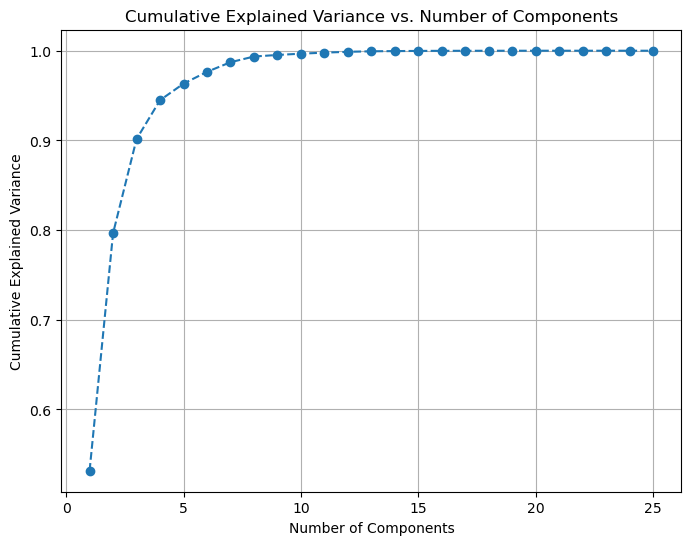

In [37]:
# Create new df excluding target variables
PCA_df =  scaled_df[['Open_TSLA', 'High_TSLA', 'Low_TSLA', 
                    'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
                    'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
                    'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ',
                    'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX',
                    'High_SPX', 'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX']]

# Initialize PCA with a large number of components
pca_tsla = PCA(n_components=len(PCA_df.columns))

# Fit PCA to the PCA_df data
pca_tsla.fit(PCA_df)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca_tsla.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [38]:
# Create a PCA object with n components
pca_tsla = PCA(n_components=5)

# Fit the PCA model to the PCA data and transform it to the principal components
principalComponents_tsla = pca_tsla.fit_transform(PCA_df)

In [39]:
# Create a DataFrame 'principal_tsla_Df' with n principal components columns
principal_tsla_Df = pd.DataFrame(data = principalComponents_tsla
             , columns = ['principal component 1', 'principal component 2', 
                          'principal component 3', 'principal component 4',
                          'principal component 5'])

# Display the last 5 rows
principal_tsla_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,0.875138,0.884452,-0.624606,-0.570087,0.220409
1,0.692203,0.871689,-0.597844,-0.653244,0.290600
2,0.800407,0.864817,-0.615337,-0.622669,0.229740
3,1.066821,0.825942,-0.678846,-0.499379,0.223604
4,1.233119,0.827037,-0.699686,-0.443046,0.096353


In [40]:
# Extract explained variance ratio
explained_variance_ratio = pca_tsla.explained_variance_ratio_

# Round the explained variance ratio to 4 decimal places
rounded_explained_variance_ratio = np.round(explained_variance_ratio, 4)

# Print explained variation per principal component
print('Explained variation per principal component: {}'.format(rounded_explained_variance_ratio))

Explained variation per principal component: [0.5317 0.2648 0.105  0.0433 0.0184]


<div style="background-color: #FFFFFF; border: 3px solid black; padding: 10px; text-align: left;">
    <span style="color: #000000; font-weight: standard; font-style: standard;">
        
Principal Component Analysis (PCA) is a technique that enables us to simplify complex data. It achieves this by condensing large datasets into a more compact form while striving to retain essential information.

In PCA, we transform data into a set of "principal components," each capturing a different aspect of the original data's variability. The first component explains the most variation in the data, followed by subsequent components. For example, if we see "Explained variation per principal component: [0.5317 0.2648 0.105  0.0433 0.0184]," it means that the first component (PC1) captures 53.17% of the data's complexity, while the second (PC2) covers 26.48%, and so on, highlighting their importance.
<ul style="list-style-type: none; padding-left: 0;"> <!-- Remove default list-style and padding -->
    <li style="color: #000000; font-weight: normal;">We also measure information loss, which indicates how much simplification occurs during the process. We calculate it as follows:</li>
    <li style="color: #000000; font-weight: normal;"><br></li> <!-- Added a blank line for spacing -->
    <li style="color: #000000; font-weight: normal;">Information Loss = 1 - Total Variance Retained</li>
    <li style="color: #000000; font-weight: normal;"><br></li> <!-- Added a blank line for spacing -->
    <li style="color: #000000; font-weight: normal;">With five retained components, they collectively preserve 96.32% of the original data's richness:</li>
    <li style="color: #000000; font-weight: normal;"><br></li> <!-- Added a blank line for spacing -->
    <li style="color: #000000; font-weight: normal;">0.5317 + 0.2648 + 0.105 + 0.0433 + 0.0184 = 0.9632</li>
    <li style="color: #000000; font-weight: normal;"><br></li> <!-- Added a blank line for spacing -->
    <li style="color: #000000; font-weight: normal;">Information Loss = 1 − 0.9632 = 0.0368</li>   
    <li style="color: #000000; font-weight: normal;"><br></li> <!-- Added a blank line for spacing -->
    <li style="color: #000000; font-weight: normal;">Therefore, the information loss is minimal, just about 3.68%.</li> 
    <li style="color: #000000; font-weight: normal;"><br></li> <!-- Added a blank line for spacing -->
    <li style="color: #000000; font-weight: normal;">In summary, PCA offers a way to simplify complex data while retaining critical information. This simplification means gaining insights from large datasets in a more manageable and comprehensible manner. The choice of how many components to retain depends on the balance between simplification and preserving essential details tailored to specific business goals.</li>         
</ul>
</div>

In [41]:
# Set a threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that exceed the threshold
num_components_to_keep = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to retain: {num_components_to_keep}")

Number of components to retain: 5


In [42]:
# Select the corresponding columns from the original dataset
selected_columns = PCA_df.columns[:num_components_to_keep]

# Create a list of features (columns) to keep
features_to_keep = df[selected_columns].columns.tolist()

# Create a list of features (columns) to delete
features_to_delete = [col for col in df.columns if col not in features_to_keep]

print("Features to Keep:")
print(features_to_keep)

print("\nFeatures to Delete:")
print(features_to_delete)


Features to Keep:
['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA', 'EPS_qtr']

Features to Delete:
['Date', 'day_week', 'Close_TSLA', 'Adj_Close_TSLA', 'open_close_TSLA', 'positive_TSLA', 'Revenue', 'oper_cash_fl', 'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX']


In [43]:
PCA_cols =  ['Open_TSLA', 'High_TSLA', 'Low_TSLA', 
            'Volume_TSLA', 'EPS_qtr', 'Revenue', 'oper_cash_fl',
            'gross_mrgn', 'oper_mrgn', 'net_mrgn', 'pe_ann', 'pe_qtr',
            'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 'Low_NDQ',
            'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX',
            'High_SPX', 'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX']


# Get the loadings of the retained components
component_loadings = pca_tsla.components_[:num_components_to_keep]

# Create a DataFrame to represent the loadings
loadings_df = pd.DataFrame(component_loadings, columns=PCA_cols)

# Absolute values of loadings for each feature
absolute_loadings = np.abs(loadings_df)

# Identify the most influential features for each component
most_influential_features = []

for i in range(num_components_to_keep):
    component_name = f"Principal Component {i + 1}"
    most_influential_feature = absolute_loadings.iloc[i].idxmax()
    most_influential_features.append((component_name, most_influential_feature))

# Display the most influential features for each component
print("Most influential features for each component:")
for component, feature in most_influential_features:
    print(f"{component}: {feature}")


Most influential features for each component:
Principal Component 1: High_NDQ
Principal Component 2: Revenue
Principal Component 3: oper_cash_fl
Principal Component 4: EPS_qtr
Principal Component 5: oper_cash_fl


In [44]:
# List the top 5 most influential features
top_5_influential_features = most_influential_features[:5]

# Initialize a dictionary to store the principal components for each feature
feature_to_components = {}

# Identify the most influential features for each principal component
for i in range(num_components_to_keep):
    component_name = f"Principal Component {i + 1}"
    
    # Find the feature with the highest loading for the current component
    most_influential_feature = absolute_loadings.iloc[i].idxmax()
    
    # Append the component and its most influential feature to a list
    most_influential_features.append((component_name, most_influential_feature))
    
    # Store the mapping of features to components
    if most_influential_feature in feature_to_components:
        feature_to_components[most_influential_feature].append(component_name)
    else:
        feature_to_components[most_influential_feature] = [component_name]

# Sort the top 5 most influential features by loading value in descending order
sorted_top_5_influential_features = sorted(top_5_influential_features, \
                           key=lambda x: -absolute_loadings.loc[int(x[0].split()[-1]) - 1, x[1]])

print("\nTop 5 Most Influential Features (Sorted by Loading Value in Descending Order):")
for component, feature in sorted_top_5_influential_features:
    # Get the loading value for the feature in the current component
    loading_value = absolute_loadings.loc[int(component.split()[-1]) - 1, feature]
    
    # Print the component, feature, and its loading value
    print(f"{component}: {feature} (Loading: {loading_value:.4f})")

# List the principal components each of the top 5 features has influence on
print("\nPrincipal Components Influenced by Top 5 Features:")
for component, feature in sorted_top_5_influential_features:
    # Identify the components where the feature is influential
    influenced_components = ', '.join(feature_to_components[feature])
    
    # Print the feature and the components it influences
    print(f"{feature} is influential in {influenced_components}")



Top 5 Most Influential Features (Sorted by Loading Value in Descending Order):
Principal Component 3: oper_cash_fl (Loading: 0.7342)
Principal Component 2: Revenue (Loading: 0.5413)
Principal Component 4: EPS_qtr (Loading: 0.5064)
Principal Component 5: oper_cash_fl (Loading: 0.4364)
Principal Component 1: High_NDQ (Loading: 0.2750)

Principal Components Influenced by Top 5 Features:
oper_cash_fl is influential in Principal Component 3, Principal Component 5
Revenue is influential in Principal Component 2
EPS_qtr is influential in Principal Component 4
oper_cash_fl is influential in Principal Component 3, Principal Component 5
High_NDQ is influential in Principal Component 1


In [45]:
# Displaying the first few rows of the 'absolute_loadings' DataFrame for reference:
# Rows correspond to principal components, and columns correspond to features.
# The values represent the absolute loadings for each feature in each principal component.
absolute_loadings


,Open_TSLA,High_TSLA,Low_TSLA,Volume_TSLA,EPS_qtr,Revenue,oper_cash_fl,gross_mrgn,oper_mrgn,net_mrgn,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,0.144651,0.148388,0.153680,0.032006,0.229139,0.040797,0.147959,0.246439,0.255679,0.188832,...,0.273201,0.266958,0.266958,0.003241,0.222530,0.235065,0.228429,0.233383,0.233383,0.021401
1,0.198731,0.206158,0.203357,0.173439,0.240763,0.541280,0.020109,0.337587,0.060733,0.152605,...,0.059319,0.052005,0.052005,0.003793,0.082674,0.081695,0.093121,0.089362,0.089362,0.046110
2,0.016644,0.021617,0.010777,0.003793,0.420136,0.019970,0.734197,0.108568,0.161218,0.186580,...,0.039399,0.046949,0.046949,0.050275,0.110658,0.123982,0.105220,0.117071,0.117071,0.052871
3,0.212147,0.216296,0.213642,0.054296,0.506384,0.049728,0.307814,0.327022,0.429416,0.346972,...,0.091640,0.090907,0.090907,0.039197,0.082210,0.088963,0.078138,0.081770,0.081770,0.026581
4,0.045011,0.056494,0.036258,0.040956,0.342014,0.140657,0.436440,0.228733,0.361915,0.301242,...,0.008003,0.004986,0.004986,0.207491,0.133585,0.132680,0.160851,0.151564,0.151564,0.304647


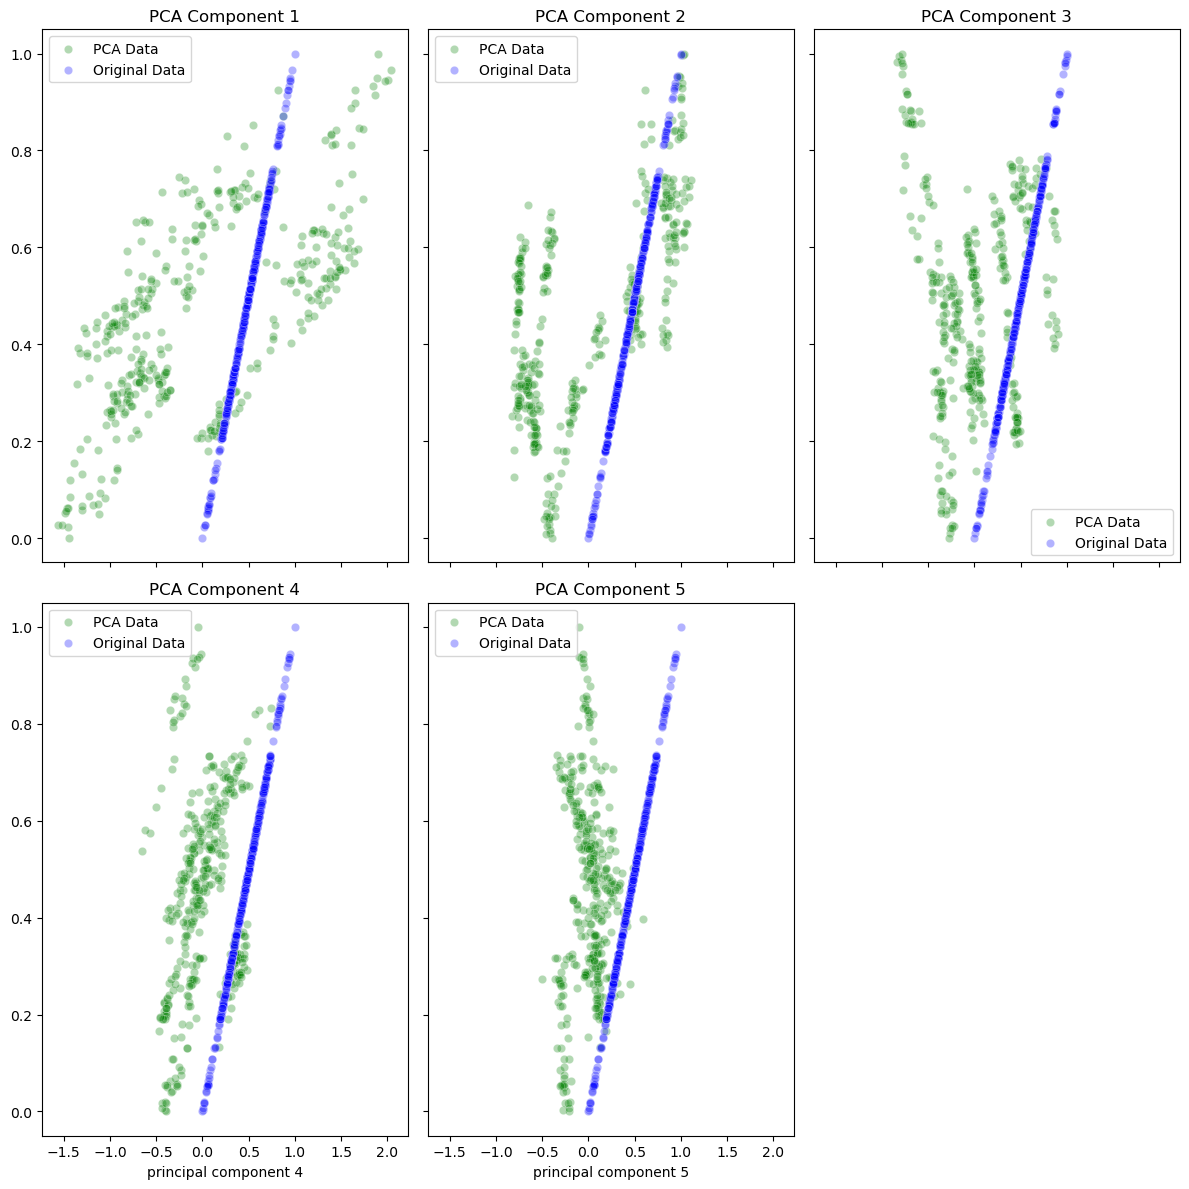

In [46]:
# Set the number of rows and columns for subplots
rows = 2
cols = 3

# Initialize the component counter
comps = 1

# Create a figure and a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 12), sharex=True, sharey=True)

# Check if there are enough components for the specified rows and columns
n_components = min(rows * cols, principal_tsla_Df.shape[1])  # Use the number of columns in principal_tsla_Df

for row in range(rows):
    for col in range(cols):
        if comps <= n_components:
            # Select the corresponding component from principal_tsla_Df
            component = principal_tsla_Df.iloc[:, comps-1]

            # Plot the selected component against scaled_data
            ax = sns.scatterplot(x=component, y=scaled_data[:, comps-1], \
                                 ax=axes[row, col], color='green', alpha=0.3, label='PCA Data')
            
            # Plot the original scaled_data
            ax = sns.scatterplot(x=scaled_data[:, comps-1], y=scaled_data[:, comps-1],\
                                 ax=axes[row, col], color='blue', alpha=0.3, label='Original Data')

            # Set the title of the subplot based on the component number
            ax.set_title(f'PCA Component {comps}')
            
            # Increment the component counter
            comps += 1
        else:
            # Remove any empty subplots
            fig.delaxes(axes[row, col])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


<div style="background-color: #FFFFFF; border: 3px solid black; padding: 10px; text-align: left;">
    <span style="color: #000000; font-weight: standard;">
        
<b>Original Data:</b> The wide scattering of data points along the X-axis suggests that the data varies significantly in that direction. This nebulous pattern means considerable variability in the data.

<b>PCA Data:</b> The upward-sloping line of the PCA data on the Y-axis indicates that the PCA (Principal Component Analysis) focuses on the primary source of data variability.

In simpler terms, the plots provide us data on:

<b>PCA Efficiency:</b> The upward-sloping line in the PCA data shows that PCA has successfully found the most important direction in the data. 

<b>Feature Highlighting:</b> This allows us to spotlight what's truly important in our data. The PCA has identified the main factors that drive the variations.

<b>Simplification:</b> By using this PCA component, we can simplify our analysis, presentations, or decisions. We get the main picture without all the complexities.

<b>Straightforward Relationships:</b> The straight line indicates a clear relationship in the data, which is suitable for understanding our data more plainly and making informed decisions.

<b>Data Compression:</b> We've streamlined our dataset just like condensing a large file into a smaller one while preserving all the crucial details. This process ensures we supply our data mining models with the most pertinent information, leading to more accurate and dependable results.

In short, seeing the original data scattered nebulously while the PCA data forms a line means that the PCA has effectively pinpointed the key factors in the data. 
        

</span>
</div>

# Modeling
## Descriptive Modeling

# Data Scaling

## Standardization

***Standardization, or z-score normalization, rescales data to match the standard normal distribution, facilitating data interchange across systems. It simplifies data processing, analysis, and storage, aiding businesses in making informed decisions by enabling easy data comparison and evaluation. Standardization is particularly useful for normally distributed data, and it lacks a bounding range, unlike normalization, which does not impact outliers in the data.***

https://www.simplilearn.com/normalization-vs-standardization-article

## Handle Outliers

Text(0.5, 1.0, 'Boxplot of Variable Raw Values')

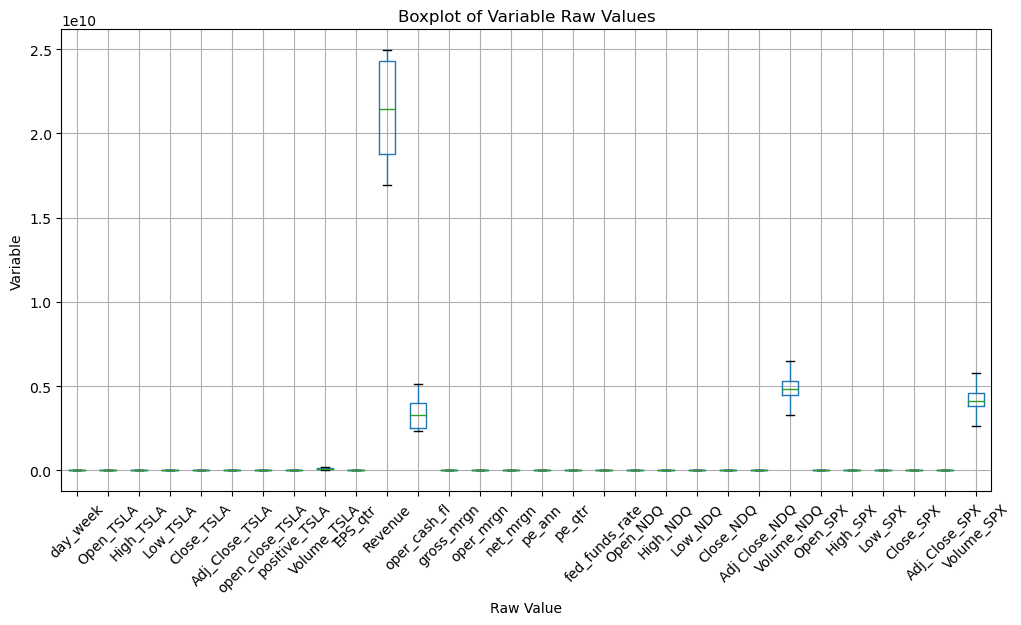

In [47]:
df_prep = df.copy().drop(columns='Date')
IQR = df_prep.quantile(.75)-df_prep.quantile(.25)
clipped_min = df_prep.quantile(.25) - (1.5*IQR)
clipped_max = df_prep.quantile(.75) + (1.5*IQR)
outliers = df_prep.columns

# Replace outlier variables with clipped_min or clipped_max, as appropriate
df_prep[outliers] = np.where(df_prep[outliers]<clipped_min[outliers], clipped_min[outliers], df_prep[outliers])
df_prep[outliers] = np.where(df_prep[outliers]>clipped_max[outliers], clipped_max[outliers], df_prep[outliers])
ax = df_prep.boxplot(return_type='axes', rot=45, figsize=(12, 6))
ax.set_xlabel("Raw Value")
ax.set_ylabel("Variable")
ax.set_title("Boxplot of Variable Raw Values")

Outlier values have been handled.

### Standardize using stats.zscore

#### Set outliers to 1.5*IQR max or min to prepare for value normalization using z score

In [48]:
# Standardize values to z score now that outliers are handled with clipping
df_z = df_prep.copy()
df_z = stats.zscore(df_z) # Standardize all columns by z score
df_z['positive_TSLA'] = df['positive_TSLA'] # Reset this column back to original '0' and '1' due to zscore

# Display Standardized DF
df_z.head()

,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,EPS_qtr,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,1.399212,0.851029,0.765022,0.692522,0.592949,0.592949,-2.000945,0,-1.077065,-1.098417,...,0.671700,0.584786,0.584786,0.586167,0.695679,0.638680,0.487960,0.390177,0.390177,1.032191
1,-1.470966,0.499909,0.515090,0.465625,0.421384,0.421384,-0.624084,0,-0.983031,-1.098417,...,0.430418,0.353229,0.353229,1.546121,0.389127,0.461609,0.336253,0.265806,0.265806,2.003548
2,-0.753422,0.468444,0.543331,0.468812,0.631666,0.631666,1.213829,1,-1.081541,-1.098417,...,0.484146,0.677210,0.677210,0.833928,0.333488,0.557319,0.438694,0.621936,0.621936,1.725016
3,-0.035877,0.667190,0.754584,0.743579,0.858643,0.858643,1.421192,1,-0.688788,-1.098417,...,0.813678,1.107476,1.107476,2.522631,0.730190,0.915417,0.689479,1.002259,1.002259,2.358729
4,0.681667,0.796761,0.945947,0.884660,1.044357,1.044357,1.843109,1,-1.087443,-1.098417,...,1.098755,1.264644,1.264644,1.114476,0.957736,1.134596,1.016839,1.216757,1.216757,1.103103


In [49]:
# Compare two Standardization techniques using descriptive statistics
df_z.describe()

,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,EPS_qtr,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
count,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,380.000000,3.800000e+02,3.800000e+02,...,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02
mean,1.145283e-16,4.487638e-16,-7.105427e-16,1.869849e-16,2.991759e-16,2.991759e-16,2.804774e-17,0.510526,-7.479397e-17,-5.235578e-16,...,4.487638e-16,-2.430804e-16,-2.430804e-16,7.479397e-16,-4.861608e-16,9.349247e-16,1.944643e-15,2.786075e-15,2.786075e-15,-2.991759e-16
std,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,0.500548,1.001318e+00,1.001318e+00,...,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00
min,-1.470966e+00,-2.278944e+00,-2.184004e+00,-2.244215e+00,-2.195722e+00,-2.195722e+00,-2.492135e+00,0.000000,-1.652278e+00,-1.298896e+00,...,-1.733516e+00,-1.734860e+00,-1.734860e+00,-2.665786e+00,-2.336412e+00,-2.144045e+00,-2.286003e+00,-2.110294e+00,-2.110294e+00,-2.481613e+00
25%,-7.534218e-01,-7.890545e-01,-7.789179e-01,-7.675021e-01,-7.743610e-01,-7.743610e-01,-6.167743e-01,0.000000,-7.358596e-01,-7.642842e-01,...,-7.969015e-01,-8.077404e-01,-8.077404e-01,-7.201294e-01,-7.037466e-01,-7.155884e-01,-6.894811e-01,-7.124092e-01,-7.124092e-01,-6.664847e-01
50%,-3.587723e-02,3.548014e-02,3.682630e-02,2.512019e-02,2.485459e-02,2.485459e-02,4.478057e-02,1.000000,-2.201452e-01,-4.301517e-01,...,-1.736443e-01,-1.631298e-01,-1.631298e-01,-1.379095e-01,-8.132595e-02,-6.169843e-02,-4.139107e-02,-6.375345e-02,-6.375345e-02,-1.817070e-01
75%,6.816674e-01,7.223124e-01,7.001031e-01,7.156598e-01,7.045724e-01,7.045724e-01,6.334661e-01,1.000000,6.135118e-01,7.058989e-01,...,9.147011e-01,9.268374e-01,9.268374e-01,5.769749e-01,7.221915e-01,7.242118e-01,7.391146e-01,7.619311e-01,7.619311e-01,5.436008e-01
max,1.399212e+00,2.595730e+00,2.557285e+00,2.457727e+00,2.665582e+00,2.665582e+00,2.508827e+00,1.000000,2.637569e+00,1.507817e+00,...,2.065793e+00,2.150749e+00,2.150749e+00,2.522631e+00,2.072470e+00,2.050242e+00,2.010781e+00,2.093446e+00,2.093446e+00,2.358729e+00


### Standardize using StandardScaler

In [50]:
# Create a copy of the original DataFrame to standardize
df_standard = df_prep.copy()

# Initialize the StandardScaler
standScaler = StandardScaler()

# Standardize the selected columns
df_standard[df_standard.columns] = standScaler.fit_transform(df_standard[df_standard.columns])

# Reset this column back to original '0' and '1' due to zscore
df_standard['positive_TSLA'] = df['positive_TSLA'] 

# Display the first few rows of the standardized DataFrame
df_standard.head()

,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,EPS_qtr,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,1.399212,0.851029,0.765022,0.692522,0.592949,0.592949,-2.000945,0,-1.077065,-1.098417,...,0.671700,0.584786,0.584786,0.586167,0.695679,0.638680,0.487960,0.390177,0.390177,1.032191
1,-1.470966,0.499909,0.515090,0.465625,0.421384,0.421384,-0.624084,0,-0.983031,-1.098417,...,0.430418,0.353229,0.353229,1.546121,0.389127,0.461609,0.336253,0.265806,0.265806,2.003548
2,-0.753422,0.468444,0.543331,0.468812,0.631666,0.631666,1.213829,1,-1.081541,-1.098417,...,0.484146,0.677210,0.677210,0.833928,0.333488,0.557319,0.438694,0.621936,0.621936,1.725016
3,-0.035877,0.667190,0.754584,0.743579,0.858643,0.858643,1.421192,1,-0.688788,-1.098417,...,0.813678,1.107476,1.107476,2.522631,0.730190,0.915417,0.689479,1.002259,1.002259,2.358729
4,0.681667,0.796761,0.945947,0.884660,1.044357,1.044357,1.843109,1,-1.087443,-1.098417,...,1.098755,1.264644,1.264644,1.114476,0.957736,1.134596,1.016839,1.216757,1.216757,1.103103


In [51]:
# Compare two Standardization techniques using descriptive statistics
df_standard.describe()

,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,EPS_qtr,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
count,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,380.000000,3.800000e+02,3.800000e+02,...,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02,3.800000e+02
mean,1.145283e-16,4.487638e-16,-7.105427e-16,1.869849e-16,2.991759e-16,2.991759e-16,2.804774e-17,0.510526,-7.479397e-17,-5.235578e-16,...,4.487638e-16,-2.430804e-16,-2.430804e-16,7.479397e-16,-4.861608e-16,9.349247e-16,1.944643e-15,2.786075e-15,2.786075e-15,-2.991759e-16
std,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,0.500548,1.001318e+00,1.001318e+00,...,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00,1.001318e+00
min,-1.470966e+00,-2.278944e+00,-2.184004e+00,-2.244215e+00,-2.195722e+00,-2.195722e+00,-2.492135e+00,0.000000,-1.652278e+00,-1.298896e+00,...,-1.733516e+00,-1.734860e+00,-1.734860e+00,-2.665786e+00,-2.336412e+00,-2.144045e+00,-2.286003e+00,-2.110294e+00,-2.110294e+00,-2.481613e+00
25%,-7.534218e-01,-7.890545e-01,-7.789179e-01,-7.675021e-01,-7.743610e-01,-7.743610e-01,-6.167743e-01,0.000000,-7.358596e-01,-7.642842e-01,...,-7.969015e-01,-8.077404e-01,-8.077404e-01,-7.201294e-01,-7.037466e-01,-7.155884e-01,-6.894811e-01,-7.124092e-01,-7.124092e-01,-6.664847e-01
50%,-3.587723e-02,3.548014e-02,3.682630e-02,2.512019e-02,2.485459e-02,2.485459e-02,4.478057e-02,1.000000,-2.201452e-01,-4.301517e-01,...,-1.736443e-01,-1.631298e-01,-1.631298e-01,-1.379095e-01,-8.132595e-02,-6.169843e-02,-4.139107e-02,-6.375345e-02,-6.375345e-02,-1.817070e-01
75%,6.816674e-01,7.223124e-01,7.001031e-01,7.156598e-01,7.045724e-01,7.045724e-01,6.334661e-01,1.000000,6.135118e-01,7.058989e-01,...,9.147011e-01,9.268374e-01,9.268374e-01,5.769749e-01,7.221915e-01,7.242118e-01,7.391146e-01,7.619311e-01,7.619311e-01,5.436008e-01
max,1.399212e+00,2.595730e+00,2.557285e+00,2.457727e+00,2.665582e+00,2.665582e+00,2.508827e+00,1.000000,2.637569e+00,1.507817e+00,...,2.065793e+00,2.150749e+00,2.150749e+00,2.522631e+00,2.072470e+00,2.050242e+00,2.010781e+00,2.093446e+00,2.093446e+00,2.358729e+00


*The two results provided for df_z.describe() and df_standard.describe() are exactly the same. This means that both standardization techniques (z-score standardization and StandardScaler scaling) have produced identical statistical summaries for the DataFrame.*

*In this case, it suggests that the two methods have achieved the same scaling effects on the data, and the summary statistics (mean, standard deviation, minimum, maximum, etc.) are consistent between the two standardized DataFrames.*

### Normalization

***Normalization is a popular method for standardizing numerical data, scaling values to a common range, typically between 0 and 1. It's especially useful for data stored in databases, provided there are no outliers. This technique simplifies data processing for comparability, particularly in machine learning and large datasets. Understanding the normalization formula helps determine its suitability for the dataset.***

https://www.simplilearn.com/normalization-vs-standardization-article

In [52]:
# Establish data frame to normalize
df_normal = df_prep.copy()

# Initialize the MinMaxScaler 
normScaler = MinMaxScaler()

# Normalize the selected columns
df_normal[df_normal.columns] = normScaler.fit_transform(df_normal[df_normal.columns])

# Display Normalized DF
df_normal.head()

,day_week,Open_TSLA,High_TSLA,Low_TSLA,Close_TSLA,Adj_Close_TSLA,open_close_TSLA,positive_TSLA,Volume_TSLA,EPS_qtr,...,Low_NDQ,Close_NDQ,Adj Close_NDQ,Volume_NDQ,Open_SPX,High_SPX,Low_SPX,Close_SPX,Adj_Close_SPX,Volume_SPX
0,1.00,0.642089,0.621988,0.624580,0.573647,0.573647,0.098219,0.0,0.134087,0.071429,...,0.633067,0.596984,0.596984,0.626772,0.687723,0.663456,0.645591,0.594821,0.594821,0.725941
1,0.00,0.570059,0.569274,0.576323,0.538355,0.538355,0.373538,0.0,0.156007,0.071429,...,0.569560,0.537390,0.537390,0.811790,0.618193,0.621239,0.610283,0.565235,0.565235,0.926621
2,0.25,0.563605,0.575231,0.577001,0.581611,0.581611,0.741050,1.0,0.133044,0.071429,...,0.583701,0.620770,0.620770,0.674524,0.605573,0.644058,0.634125,0.649952,0.649952,0.869077
3,0.50,0.604376,0.619787,0.635438,0.628302,0.628302,0.782515,1.0,0.224598,0.071429,...,0.670436,0.731503,0.731503,1.000000,0.695551,0.729436,0.692491,0.740425,0.740425,1.000000
4,0.75,0.630956,0.660148,0.665443,0.666504,0.666504,0.866882,1.0,0.131668,0.071429,...,0.745470,0.771952,0.771952,0.728596,0.747162,0.781692,0.768678,0.791450,0.791450,0.740591


## Perform Train_Test_Split on Normalized/Standardized Data sets

#### Partition Original dataset 'X' and 'y' into their own variables / dataframes for Logistic Regression

In [53]:
# Set X and y variables after feature selection
X_log = df[['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA', 'EPS_qtr']]
y_log = df['positive_TSLA']


# Split the data into training and testing sets with a 60-40 ratio 
X_log_train, X_log_test, y_log_train, y_log_test = \
    train_test_split(X_log, y_log, test_size=0.4, random_state=14)

# Output the shapes of the training and testing datasets for verification.
print("Training data shapes:", X_log_train.shape, y_log_train.shape)
print("Testing data shapes:", X_log_test.shape, y_log_test.shape)

Training data shapes: (228, 5) (228,)
Testing data shapes: (152, 5) (152,)


#### Partition Original dataset 'X' and 'y' into their own variables / dataframes for Linear Regression

In [54]:
# Set X and y variables after feature selection
X_lin = df[['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA', 'EPS_qtr']]
y_lin = df['Close_TSLA']


# Split the data into training and testing sets with a 60-40 ratio 
X_lin_train, X_lin_test, y_lin_train, y_lin_test = \
    train_test_split(X_lin, y_lin, test_size=0.4, random_state=14)

# Output the shapes of the training and testing datasets for verification.
print("Training data shapes:", X_lin_train.shape, y_lin_train.shape)
print("Testing data shapes:", X_lin_test.shape, y_lin_test.shape)

Training data shapes: (228, 5) (228,)
Testing data shapes: (152, 5) (152,)


#### Partition StandardScaler Standardized dataset 'X' and 'y' into their own variables / dataframes

In [55]:
# Set X and y variables after feature selection
X_stand = df_standard[['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA', 'EPS_qtr']]
y_stand = df_standard['Close_TSLA']


# Split the data into training and testing sets with a 60-40 ratio 
X_stand_train, X_stand_test, y_stand_train, y_stand_test = \
    train_test_split(X_stand, y_stand, test_size=0.4, random_state=14)

# Output the shapes of the training and testing datasets for verification.
print("Training data shapes:", X_stand_train.shape, y_stand_train.shape)
print("Testing data shapes:", X_stand_test.shape, y_stand_test.shape)

Training data shapes: (228, 5) (228,)
Testing data shapes: (152, 5) (152,)


#### Partition ZScore Standardized dataset 'X' and 'y' into their own variables / dataframes

In [56]:
# Set X and y variables after feature selection
X_z = df_z[['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA', 'EPS_qtr']]
y_z = df_z['positive_TSLA']

# Split the data into training and testing sets with a 60-40 ratio 
X_z_train, X_z_test, y_z_train, y_z_test = \
    train_test_split(X_z, y_z, test_size=0.4, random_state=14)

# Output the shapes of the training and testing datasets for verification.
print("Training data shapes:", X_z_train.shape, y_z_train.shape)
print("Testing data shapes:", X_z_test.shape, y_z_test.shape)

Training data shapes: (228, 5) (228,)
Testing data shapes: (152, 5) (152,)


#### Partition MinMaxScaler Normalized dataset 'X' and 'y' into their own variables / dataframes

In [57]:
# Set X and y variables after feature selection
X_norm = df_normal[['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA', 'EPS_qtr']]
y_norm = df_normal['positive_TSLA']

# Split the data into training and testing sets with a 60-40 ratio 
X_norm_train, X_norm_test, y_norm_train, y_norm_test = \
    train_test_split(X_norm, y_norm, test_size=0.4, random_state=14)

# Output the shapes of the training and testing datasets for verification.
print("Training data shapes:", X_norm_train.shape, y_norm_train.shape)
print("Testing data shapes:", X_norm_test.shape, y_norm_test.shape)

Training data shapes: (228, 5) (228,)
Testing data shapes: (152, 5) (152,)


## Linear Regression on Original Values

In [58]:
# # Also removing parent variables as they accounted for in the newly derived variable open_close_TSLA and annual PE
# train_Xz = df_z.drop(columns=['day_week', 'Close_TSLA', 'Adj_Close_TSLA', 'open_close_TSLA', 
#                               'positive_TSLA', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 
#                               'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 
#                               'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'])
# train_yz = df_z['open_close_TSLA']

# # Print coefficients of the regression model in descending order
# lr_full_z = LinearRegression().fit(train_Xz, train_yz)
# lr_full_coef_z = pd.DataFrame(zip(train_Xz.columns, lr_full_z.coef_))
# lr_full_coef_z.sort_values(by=1, ascending=False)


# ***Delete above?***

# Print coefficients of the regression model in descending order
lr_full_z = LinearRegression().fit(X_z_train, y_z_train)
lr_full_coef_z = pd.DataFrame(zip(X_z_train.columns, lr_full_z.coef_))
lr_full_coef_z.sort_values(by=1, ascending=False)

,0,1
2,Low_TSLA,2.892392
1,High_TSLA,2.122099
3,Volume_TSLA,0.015626
4,EPS_qtr,0.006160
0,Open_TSLA,-5.015422


In [59]:
# # Repeat on original dataframe

# # Separate 'X' and 'y' into their own variables / dataframes
# # Also removing parent variables so as not to influence training on target derived variable
# train_X = df.drop(columns=['Date', 'day_week', 'Close_TSLA', 'Adj_Close_TSLA', 'open_close_TSLA', 
#                               'positive_TSLA', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 
#                               'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 
#                               'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'])
# train_y = df['open_close_TSLA']

# lr_full = LinearRegression().fit(train_X, train_y)
# lr_full_coef = pd.DataFrame(zip(train_X.columns, lr_full.coef_))
# lr_full_coef.sort_values(by=1, ascending=False)

# ***Delete above?***

# Repeat on original data frame
lr_full = LinearRegression().fit(X_lin_train, y_lin_train)
lr_full_coef = pd.DataFrame(zip(X_lin_train.columns, lr_full.coef_))
lr_full_coef.sort_values(by=1, ascending=False)

,0,1
1,High_TSLA,9.058634e-01
2,Low_TSLA,8.329643e-01
3,Volume_TSLA,-2.163684e-09
0,Open_TSLA,-7.454932e-01
4,EPS_qtr,-1.508030e+00


### Logistic Regression on Original df (Cross Validated x5 w/ L2 penalty)

In [60]:
# df_lr = df.copy()
# # Remove redundant variables (due to target variable being derived by these parent variables)
# train_X_lr = df_lr.drop(columns=['Date', 'day_week', 'Close_TSLA', 'Adj_Close_TSLA', 'open_close_TSLA', 
#                               'positive_TSLA', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 
#                               'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 
#                               'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'])
# # Separate the target variable to train on if TSLA close went up or down (without regard to magnitude)
# train_y_lr = df_lr['positive_TSLA']

# logit_train = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
# logit_train.fit(train_X_lr, train_y_lr)


# ***Delete above?***

logit_train = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
logit_train.fit(X_log_train, y_log_train)

# Derived from Shmueli (2019)
print('intercept ', logit_train.intercept_[0])
print(pd.DataFrame({'coeff': logit_train.coef_[0]}, index=X_log_train.columns).sort_values(by='coeff', ascending=False))

intercept  -3.268301243892415e-07
                    coeff
Volume_TSLA  1.953856e-09
EPS_qtr     -3.035751e-07
Low_TSLA    -9.422181e-05
High_TSLA   -9.964741e-05
Open_TSLA   -1.740069e-04


### Logistic Regression on Z-scores Standardized df (Cross Validated x5 w/ L2 penalty)

In [61]:
# df_lr_z = df_z.copy()
# train_X_lr_z = df_lr_z.drop(columns=['day_week', 'Close_TSLA', 'Adj_Close_TSLA', 'open_close_TSLA', 
#                               'positive_TSLA', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 
#                               'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 
#                               'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'])
# train_y_lr_z = df_lr['positive_TSLA']

# logit_train_z = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
# logit_train_z.fit(train_X_lr_z, train_y_lr_z)

# # Derived from Shmueli (2019)
# print('intercept ', logit_train_z.intercept_[0])
# print(pd.DataFrame({'coeff': logit_train_z.coef_[0]}, index=train_X_lr_z.columns).sort_values(by='coeff', ascending=False))

# ***Delete above?***

logit_train_z = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500) #l2 penalty by default
logit_train_z.fit(X_z_train, y_z_train)

# Derived from Shmueli (2019)
print('intercept ', logit_train_z.intercept_[0])
print(pd.DataFrame({'coeff': logit_train_z.coef_[0]}, index=X_z_train.columns).sort_values(by='coeff', ascending=False))

intercept  0.09133892138932366
                 coeff
Low_TSLA     25.754142
High_TSLA    20.428255
EPS_qtr       0.088652
Volume_TSLA   0.045889
Open_TSLA   -46.303443


## Predictive Model
### [To-Do]: Build model(s) based on previous records' ability to predict future price movement.
#### Can previous data be used to predict future data?

In [62]:
#df = df.drop(columns=[''])

In [63]:
X_z_train.columns

Index(['Open_TSLA', 'High_TSLA', 'Low_TSLA', 'Volume_TSLA', 'EPS_qtr'], dtype='object')

In [64]:
# Ref. https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
# Divide features into arrays by type
tesla = [
  
]
nasdaq = [
  
]
# Categorical is assumed because original dataset did not have a README file defining these feature names
# Ambiguous on m_dep, n_cores (number or type), and price range (could be basic, low, medium, high)
spx = [
  
]

In [65]:
# ***Delete above?***

In [66]:
# # Reference: https://www.dataquest.io/blog/portfolio-project-predicting-stock-prices-using-pandas-and-scikit-learn/
# df_rf = df.copy()

# # Column divide into predictors and target
# X_rf = df_rf.drop(columns=['Date', 'day_week', 'Close_TSLA', 'Adj_Close_TSLA', 'open_close_TSLA', 
#                               'positive_TSLA', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 
#                               'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 
#                               'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'])
# y_rf = df_rf['positive_TSLA']

# # Truncate number of records at the beginning for target and the end for predictors by 'depth_days'
# # This is to avoid going outside of index
# depth_days = 5
# predictors = X_rf.iloc[:-depth_days]
# target = y_rf.iloc[depth_days:]#.reset_index(drop=True) #Align indices of target down to predictor indices

# #X_subset = pd.DataFrame()

# #for i in range([0:depth_days]):
# #    if i < depth_days:
# #        X_subset.iloc[i] = 0
# #    else:
# #        X_subset.iloc[i] = df.iloc[i-6:i-1]
# #    X_subset.concat([X, x[i]], axis=1)
    
# #X_subset

# # Split data into training and validation sets
# train_df, valid_df, train_y, valid_y = train_test_split(predictors, target, test_size=0.4, random_state=14)

# ***Delete above?***

rf_train = RandomForestClassifier(n_estimators=100, min_samples_split=128, criterion='gini', random_state=14)
rf_train.fit(X_norm_train, y_norm_train)

rf_train_pred = rf_train.predict(X_norm_test[X_norm.columns])
rf_train_pred = pd.Series(rf_train_pred, index=X_norm_test.index)
precision = precision_score(y_norm_test, rf_train_pred)
print("Precision =", round(precision,4))

Precision = 0.4955


In [67]:
# Referencing directly from Schmueli's (2019) use of DecisionTreeRegressor and using param_grid as default values
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [1, 3, 5, 10],
    'min_samples_split': [2, 4, 8, 16, 32, 64, 128], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1) # CV with 5 folds and all CPUs
grid_search.fit(X_norm, y_norm)

rf = grid_search.best_estimator_

In [68]:
rf

RandomForestClassifier(max_depth=10, min_impurity_decrease=0, n_estimators=200)

In [69]:
# rf_cv = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, min_samples_split=8, random_state=14)
# rf_cv.fit(train_df, train_y)

# rf_cv_pred = rf_cv.predict(valid_df[predictors.columns])
# rf_cv_pred = pd.Series(rf_cv_pred, index=valid_df.index)
# precision = precision_score(valid_y, rf_cv_pred)
# print("Precision =", precision)

# ***Delete above?***

rf_cv = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, min_samples_split=8, random_state=14)
rf_cv.fit(X_norm_train, y_norm_train)

rf_cv_pred = rf_cv.predict(X_norm_test[X_norm.columns])
rf_cv_pred = pd.Series(rf_cv_pred, index=X_norm_test.index)
precision = precision_score(y_norm_test, rf_cv_pred)
print("Precision =", round(precision,4))


Precision = 0.5632


In [70]:
pd.DataFrame(zip(rf_cv.feature_names_in_, rf_cv.feature_importances_)).sort_values(by=1, ascending=False)

,0,1
3,Volume_TSLA,0.267888
0,Open_TSLA,0.254835
2,Low_TSLA,0.219280
1,High_TSLA,0.209953
4,EPS_qtr,0.048044


### Predictive Model #2: Use trailing n days (depth_days) to predict if the next day will be positive or not
#### Not using index shift like above

In [72]:
depth_days = 7
prediction_index = 14
X_norm.iloc[prediction_index]

Open_TSLA      0.949559
High_TSLA      0.939177
Low_TSLA       0.986366
Volume_TSLA    0.037969
EPS_qtr        0.071429
Name: 14, dtype: float64

In [74]:
X_norm.iloc[prediction_index-depth_days:prediction_index]

,Open_TSLA,High_TSLA,Low_TSLA,Volume_TSLA,EPS_qtr
7,0.750635,0.810413,0.788264,0.340933,0.071429
8,0.811000,0.862809,0.858161,0.419810,0.071429
9,0.847008,0.842983,0.874020,0.144121,0.071429
10,0.844917,0.839693,0.884917,0.107424,0.071429
11,0.913937,0.932744,0.956898,0.323022,0.071429
12,0.965780,0.953401,0.981851,0.169126,0.071429
13,0.945449,0.952398,0.995779,0.095883,0.071429


In [75]:
predictors = X_norm.iloc[prediction_index-depth_days:prediction_index]
target = y_norm.iloc[prediction_index]

In [76]:
target

0.0

In [ ]:
# User-defined: How many previous days do you want to use for the prediction?
depth_days = 10
prediction_index = 200 #To-Do: Find a way to iterate through for all prediction indices
prediction_index_values = X_rf.index.values # Array of index values in X_rf

# Find a way to partition training set as the set of all depth_days long trailing records with target
# positive_TSLA value of next record
# Goal: Training set[previous n-records from index-1 to index-depth_days]
#       Target set['positive_TSLA'].iloc[<index>]

X_subset = pd.DataFrame()
for x in prediction_index_values:
    if x < depth_days:
        break
    else:
        X_subset.concat([X_subset],axis=1)

predictor_index_range = prediction_index_values[prediction_index-depth_days:prediction_index]
predictors = X_rf.iloc[predictor_index_range]
target = y_rf.iloc[prediction_index]

rf_train = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, \
                                                        min_samples_split=8, random_state=14)
#rf_train.fit(predictors, target)

# Split data into training and validation sets
#train_df, valid_df, train_y, valid_y = train_test_split(predictors, target, test_size=0.4, random_state=1)

#rf_train_pred = rf_train.predict(valid_df[predictors.columns])
#rf_train_pred = pd.Series(rf_train_pred, index=valid_df.index)
#precision = precision_score(valid_y, rf_train_pred)
#print("Precision =", precision)

### A priori model: Train on known positive_TSLA = 1 for intraday

In [77]:
# X_z = df_z.drop(columns=['day_week', 'Close_TSLA', 'Adj_Close_TSLA', 'open_close_TSLA', 
#                               'positive_TSLA', 'pe_ann', 'pe_qtr', 'fed_funds_rate', 'Open_NDQ', 'High_NDQ', 
#                               'Low_NDQ', 'Close_NDQ', 'Adj Close_NDQ', 'Volume_NDQ', 'Open_SPX', 'High_SPX', 
#                               'Low_SPX', 'Close_SPX', 'Adj_Close_SPX', 'Volume_SPX'])
# y_z = df_z['positive_TSLA']

# pos_train_df, pos_valid_df, pos_train_y, pos_valid_y = train_test_split(X_z, y_z, test_size=0.4, random_state=1)

# rf_train = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, \
#                                                         min_samples_split=8, random_state=14)
# rf_train.fit(pos_train_df, pos_train_y)

# rf_train_pred = rf_train.predict(pos_valid_df[X_z.columns])
# rf_train_pred = pd.Series(rf_train_pred, index=pos_valid_df.index)
# precision = precision_score(pos_valid_y, rf_train_pred)
# print("Precision =", precision)

# ***Delete above?***

rf_train = RandomForestClassifier(max_depth=10, min_impurity_decrease=0, min_samples_split=8, random_state=14)
rf_train.fit(X_norm_train, y_norm_train)

rf_train_pred = rf_train.predict(X_norm_test)  # Predict on the test data directly, no need for indexing
precision = precision_score(y_norm_test, rf_train_pred)
print("Precision =", round(precision,4))


Precision = 0.5632


In [78]:
# mlp = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
# mlp.fit(pos_train_df, pos_train_y)

# nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
# nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
# precision = precision_score(pos_valid_y, nn_train_pred)
# print("Precision =", precision)

# #print(confusion_matrix(pos_valid_y, nn_train_pred))
# #print(classification_report(pos_valid_y, nn_train_pred))

# ***Delete above?***

# Create and fit the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(X_norm_train, y_norm_train)

# Predict on the test data
nn_train_pred = mlp.predict(X_norm_test)

# Calculate precision using the true test labels and predicted values
precision = precision_score(y_norm_test, nn_train_pred)
print("Precision =", round(precision, 4))

print(confusion_matrix(y_norm_test, nn_train_pred))
print(classification_report(y_norm_test, nn_train_pred))

Precision = 0.8375
[[66 13]
 [ 6 67]]
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.87        79
         1.0       0.84      0.92      0.88        73

    accuracy                           0.88       152
   macro avg       0.88      0.88      0.87       152
weighted avg       0.88      0.88      0.87       152



In [79]:
# mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
# mlp.fit(pos_train_df, y_z_train)

# nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
# nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
# precision = precision_score(pos_valid_y, nn_train_pred)
# print("Precision =", precision)

# #print(confusion_matrix(pos_valid_y, nn_train_pred))
# #print(classification_report(pos_valid_y, nn_train_pred))

# ***Delete above?***

mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='relu', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(X_norm_train, y_norm_train)

nn_train_pred = mlp.predict(X_norm_test[X_norm.columns])
nn_train_pred = pd.Series(nn_train_pred, index=X_norm_test.index)
precision = precision_score(y_norm_test, nn_train_pred)
print("Precision =", round(precision,4))

print(confusion_matrix(y_norm_test, nn_train_pred))
print(classification_report(y_norm_test, nn_train_pred))

Precision = 0.9077
[[73  6]
 [14 59]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        79
         1.0       0.91      0.81      0.86        73

    accuracy                           0.87       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.87      0.87       152



Precision = 0.8701
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90        79
         1.0       0.87      0.92      0.89        73

    accuracy                           0.89       152
   macro avg       0.90      0.90      0.89       152
weighted avg       0.90      0.89      0.89       152



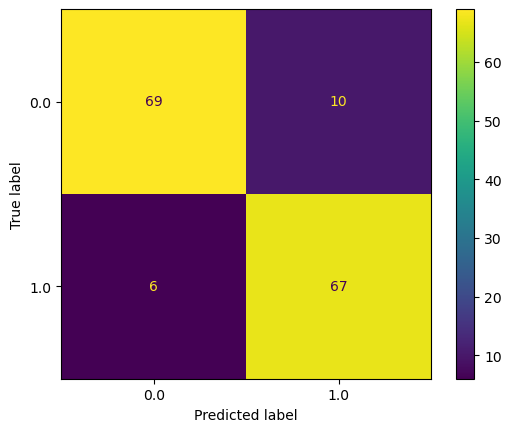

In [80]:
# mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='identity', solver='lbfgs', max_iter=500, random_state=14)
# mlp.fit(pos_train_df, pos_train_y)

# nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
# nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
# precision = precision_score(pos_valid_y, nn_train_pred)
# print("Precision =", precision)

# # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# #            #sklearn.metrics.ConfusionMatrixDisplay
# cm = confusion_matrix(pos_valid_y, nn_train_pred, labels=mlp.classes_)
# cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
# cmd.plot()
# print(classification_report(pos_valid_y, nn_train_pred))


# ***Delete above?***


mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), activation='identity', solver='lbfgs', max_iter=500, random_state=14)
mlp.fit(X_norm_train, y_norm_train)

nn_train_pred = mlp.predict(X_norm_test[X_norm.columns])
nn_train_pred = pd.Series(nn_train_pred, index=X_norm_test.index)
precision = precision_score(y_norm_test, nn_train_pred)
print("Precision =", round(precision,4))

cm = confusion_matrix(y_norm_test, nn_train_pred, labels=mlp.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
cmd.plot()

print(classification_report(y_norm_test, nn_train_pred))

In [81]:
# mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='identity', solver='lbfgs', max_iter=500, random_state=17)
# mlp.fit(pos_train_df, pos_train_y)

# nn_train_pred = mlp.predict(pos_valid_df[X_z.columns])
# nn_train_pred = pd.Series(nn_train_pred, index=pos_valid_df.index)
# precision = precision_score(pos_valid_y, nn_train_pred)
# print("Precision =", precision)

# #print(confusion_matrix(pos_valid_y, nn_train_pred))
# #print(classification_report(pos_valid_y, nn_train_pred))

# ***Delete above?***

mlp = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='identity', solver='lbfgs', max_iter=500, random_state=17)
mlp.fit(X_norm_train, y_norm_train)

nn_train_pred = mlp.predict(X_norm_test[X_norm.columns])
nn_train_pred = pd.Series(nn_train_pred, index=X_norm_test.index)
precision = precision_score(y_norm_test, nn_train_pred)
print("Precision =", round(precision,4))

print(confusion_matrix(y_norm_test, nn_train_pred))
print(classification_report(y_norm_test, nn_train_pred))

Precision = 0.8701
[[69 10]
 [ 6 67]]
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90        79
         1.0       0.87      0.92      0.89        73

    accuracy                           0.89       152
   macro avg       0.90      0.90      0.89       152
weighted avg       0.90      0.89      0.89       152



In [82]:
# Referencing directly from Schmueli's (2019) use of DecisionTreeRegressor and using param_grid as default values
param_grid = {
    'hidden_layer_sizes': [1, 2, 4, 8, 16],
    'activation': ["relu"],
    'solver': ['lbfgs'],
    'max_iter': [500, 1000, 2000], 
}

grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, n_jobs=-1) # CV with 5 folds and all CPUs
grid_search.fit(X_norm, y_norm)

rf = grid_search.best_estimator_

In [83]:
rf

MLPClassifier(hidden_layer_sizes=2, max_iter=2000, solver='lbfgs')

In [84]:
pd.set_option('display.max_rows',380)
predictors

,Open_TSLA,High_TSLA,Low_TSLA,Volume_TSLA,EPS_qtr
7,0.750635,0.810413,0.788264,0.340933,0.071429
8,0.811000,0.862809,0.858161,0.419810,0.071429
9,0.847008,0.842983,0.874020,0.144121,0.071429
10,0.844917,0.839693,0.884917,0.107424,0.071429
11,0.913937,0.932744,0.956898,0.323022,0.071429
12,0.965780,0.953401,0.981851,0.169126,0.071429
13,0.945449,0.952398,0.995779,0.095883,0.071429


### Regression Tree model

In [85]:
# Create a base Decision Tree Regressor with a range of max_depth values to search 
tree_reg = DecisionTreeRegressor(random_state=1)

# Specify the values of max_depth to search
param_grid = {'max_depth': [2, 3, 4, 5, 10, 15, 20]}

# find optimal max_depth parameter
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_stand_train, y_stand_train)

# Set variable to hold optimal max_depth
best_max_depth = grid_search.best_params_['max_depth']
print("The best max_depth is: ", best_max_depth)

# Fit a Decision Tree Regression model
rt_model = DecisionTreeRegressor(max_depth=best_max_depth,random_state=1)
rt_model.fit(X_stand_train, y_stand_train)

# Make predictions on the validation set
y_pred_rt = rt_model.predict(X_stand_test)

# Calculate evaluation measures
mse_rt = mean_squared_error(y_stand_test, y_pred_rt)
rmse_rt = mean_squared_error(y_stand_test, y_pred_rt, squared=False)
mae_rt = mean_absolute_error(y_stand_test, y_pred_rt)
r2_rt = r2_score(y_stand_test, y_pred_rt)

# Apply formatting to the outcomes 
mse_rt = '{:,.4f}'.format(mse_rt)
rmse_rt = '{:.4f}'.format(rmse_rt)
mae_rt = '{:.4f}'.format(mae_rt)
r2_rt = '{:.4f}'.format(r2_rt)


print('Mean Squared Error (MSE) - Tree:', mse_rt)
print('Root Mean Squared Error (RMSE) - Tree:', rmse_rt)
print('Mean Absolute Error (MAE) - Tree:', mae_rt)
print('R-squared (R2) - Tree:', r2_rt)

The best max_depth is:  5
Mean Squared Error (MSE) - Tree: 0.0109
Root Mean Squared Error (RMSE) - Tree: 0.1043
Mean Absolute Error (MAE) - Tree: 0.0813
R-squared (R2) - Tree: 0.9882


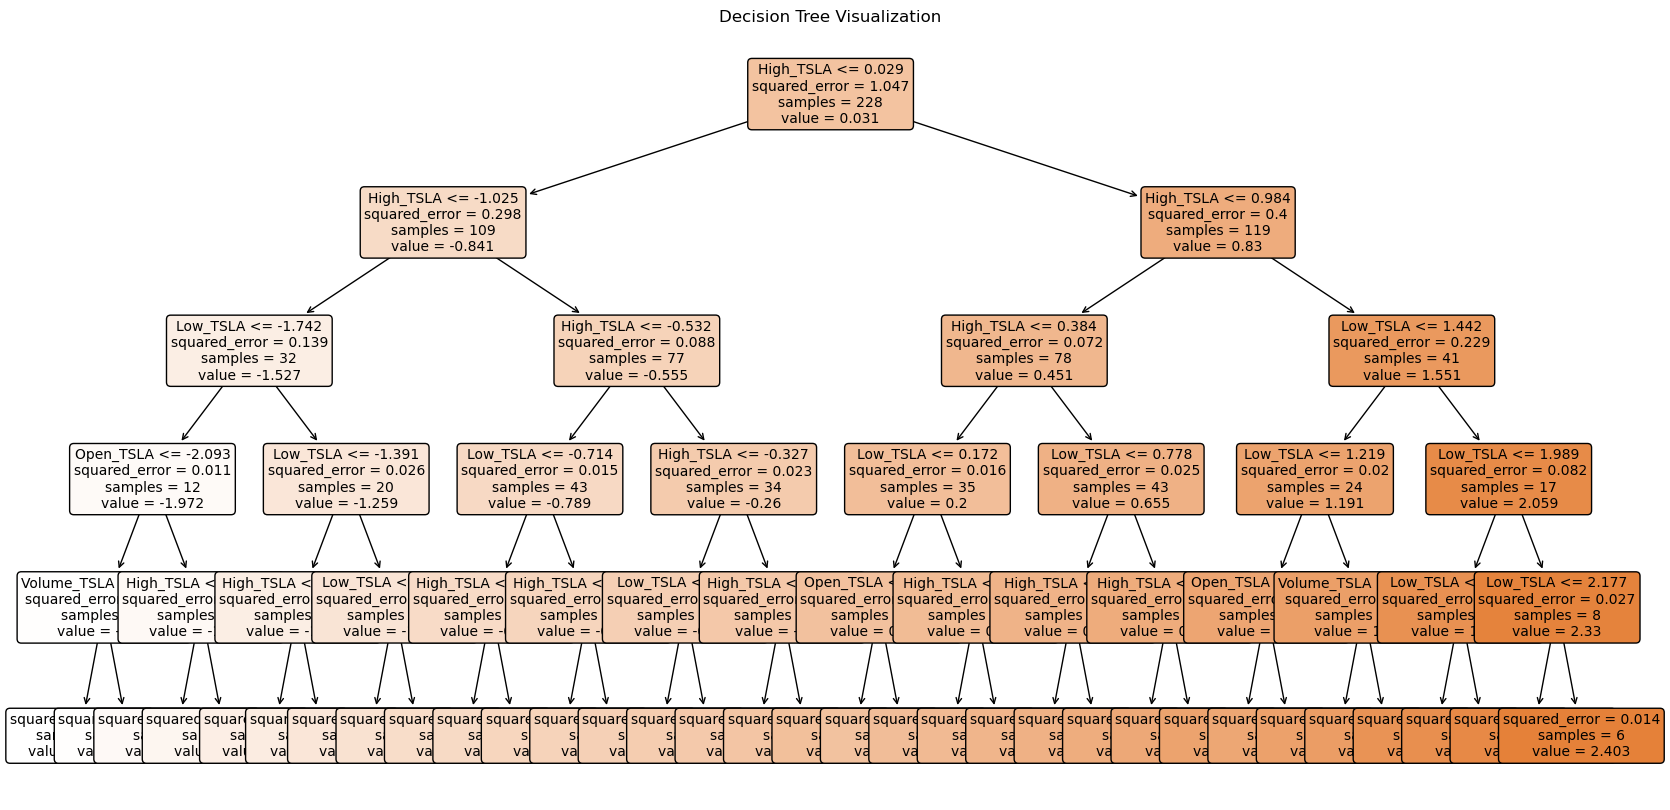

In [86]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(rt_model, feature_names=X_stand.columns.to_list(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

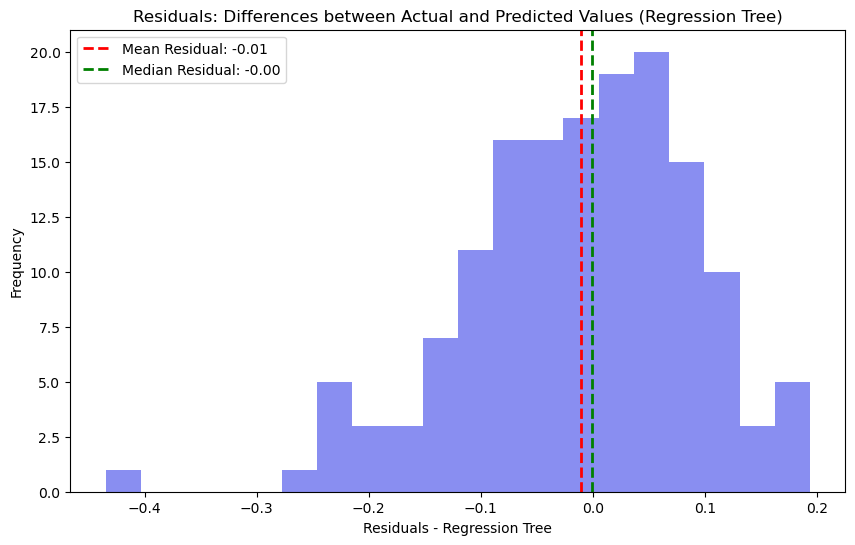

In [87]:
# Calculate residuals
residuals_rt = y_stand_test - y_pred_rt

# Create a histogram of residuals for the decision tree model
plt.figure(figsize=(10, 6))
plt.hist(residuals_rt, bins=20, alpha=0.5, color='#141ee5')  

# Calculate mean and median of residuals for the decision tree model
mean_residual_rt = residuals_rt.mean()
median_residual_rt = np.median(residuals_rt)

# Add mean and median lines with value labels for the decision tree model
plt.axvline(mean_residual_rt, color='red', linestyle='dashed',\
            linewidth=2, label=f'Mean Residual: {mean_residual_rt:.2f}')

plt.axvline(median_residual_rt, color='green', linestyle='dashed',\
            linewidth=2, label=f'Median Residual: {median_residual_rt:.2f}')

plt.xlabel('Residuals - Regression Tree')
plt.ylabel('Frequency')
plt.title('Residuals: Differences between Actual and Predicted Values (Regression Tree)')
plt.legend()
plt.show()

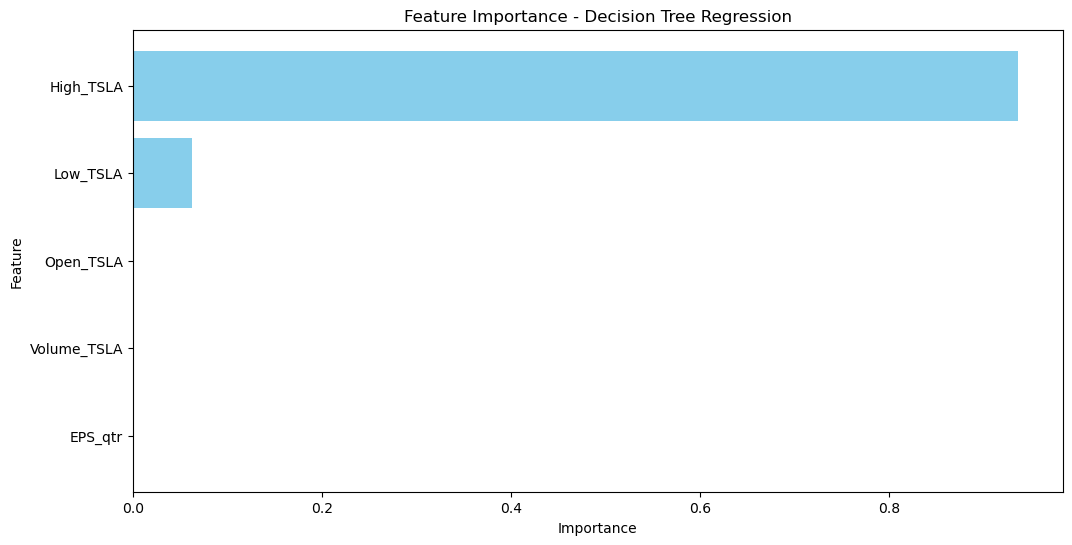

In [88]:
# Get feature importance from the trained Decision Tree model
feature_importances = rt_model.feature_importances_

# Get the names of the features
feature_names = X_stand.columns

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart to visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree Regression')
plt.gca().invert_yaxis()  
plt.show()

### Linear Regression Model

In [89]:
# Define X and y for the linear regression model
X_linear = X_stand
y_linear = y_stand

# Split data into training (60%) and validation (40%) sets
X_train_linear, X_valid_linear, y_train_linear, y_valid_linear\
= train_test_split(X_linear, y_linear, test_size=0.4, random_state=1)

# Fit a multiple linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_linear, y_train_linear)

# Make predictions on the validation set (X_valid_linear)
y_pred_linear = linear_reg_model.predict(X_valid_linear)

# Calculate evaluation measures for the linear regression model
mse_linear = mean_squared_error(y_valid_linear, y_pred_linear)
rmse_linear = mean_squared_error(y_valid_linear, y_pred_linear, squared=False)
mae_linear = mean_absolute_error(y_valid_linear, y_pred_linear)
r2_linear = r2_score(y_valid_linear, y_pred_linear)

# Apply formatting to the outcomes 
mse_linear = '{:,.4f}'.format(mse_linear)
rmse_linear = '{:.4f}'.format(rmse_linear)
mae_linear = '{:.4f}'.format(mae_linear)
r2_linear = '{:.4f}'.format(r2_linear)

# Print coefficients
coefficients = pd.DataFrame({'Predictor': X_linear.columns, 'Coefficient': linear_reg_model.coef_})
display(coefficients)

# Print evaluation measures for the linear regression model
print('Mean Squared Error (MSE) - Linear Regression:', mse_linear)
print('Root Mean Squared Error (RMSE) - Linear Regression:', rmse_linear)
print('Mean Absolute Error (MAE) - Linear Regression:', mae_linear)
print('R-squared (R2) - Linear Regression:', r2_linear)

,Predictor,Coefficient
0,Open_TSLA,-0.636935
1,High_TSLA,0.787615
2,Low_TSLA,0.842674
3,Volume_TSLA,-0.000715
4,EPS_qtr,-0.001287


Mean Squared Error (MSE) - Linear Regression: 0.0030
Root Mean Squared Error (RMSE) - Linear Regression: 0.0548
Mean Absolute Error (MAE) - Linear Regression: 0.0438
R-squared (R2) - Linear Regression: 0.9970


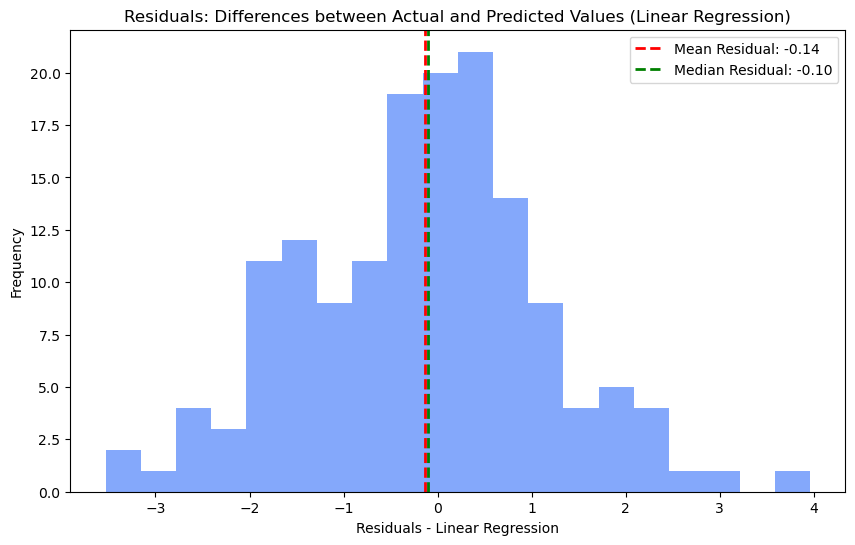

In [90]:
# Calculate residuals
residuals = y_stand_test - y_pred_linear

# Create a histogram of residuals 
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.5, color='#0b52f9')  

# Calculate mean and median of residuals
mean_residual = residuals.mean()
median_residual = np.median(residuals)

# Add mean and median lines with value labels
plt.axvline(mean_residual, color='red', linestyle='dashed',\
            linewidth=2, label=f'Mean Residual: {mean_residual:.2f}')

plt.axvline(median_residual, color='green', linestyle='dashed',\
            linewidth=2, label=f'Median Residual: {median_residual:.2f}')

plt.xlabel('Residuals - Linear Regression')
plt.ylabel('Frequency')
plt.title('Residuals: Differences between Actual and Predicted Values (Linear Regression)')
plt.legend()
plt.show()

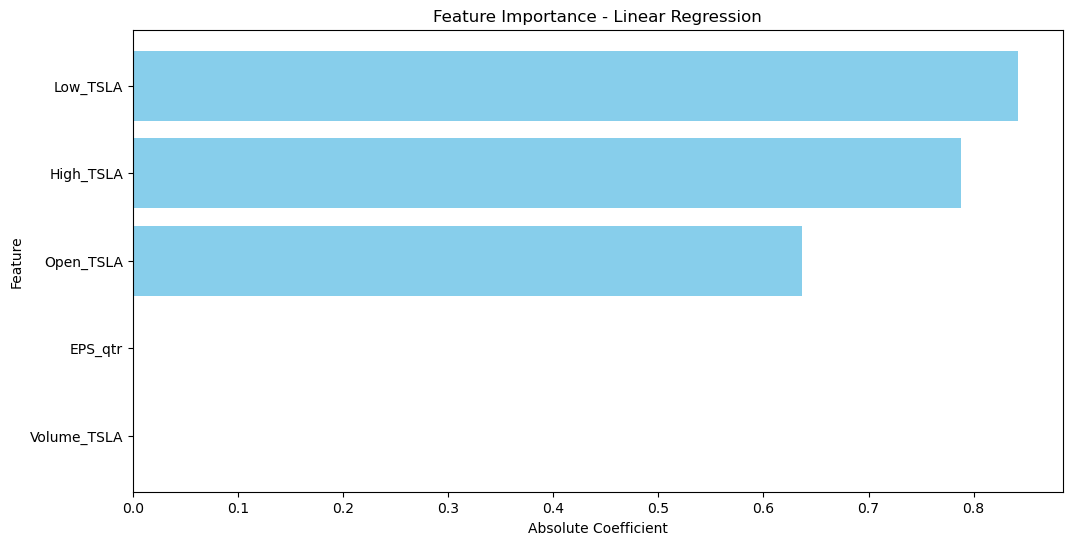

In [91]:
# Get the coefficients (importance) of the features from the trained Linear Regression model
coefficients = linear_reg_model.coef_

# Get the names of the features
feature_names = X_stand.columns

# Create a DataFrame to store feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by absolute coefficient values in descending order
feature_importance_df['Absolute Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Create a bar chart to visualize feature importance (absolute coefficients)
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance - Linear Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### Random Forest Model

In [92]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
rf.fit(X_stand_train, y_stand_train)
#predict
y_pred = rf.predict(X_stand_test)

In [93]:
#Model evaluation
mse = mean_squared_error(y_stand_test, y_pred)
r2 = r2_score(y_stand_test, y_pred)

In [94]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.00823947571009586
R-squared (R2) Score: 0.9910951267970949


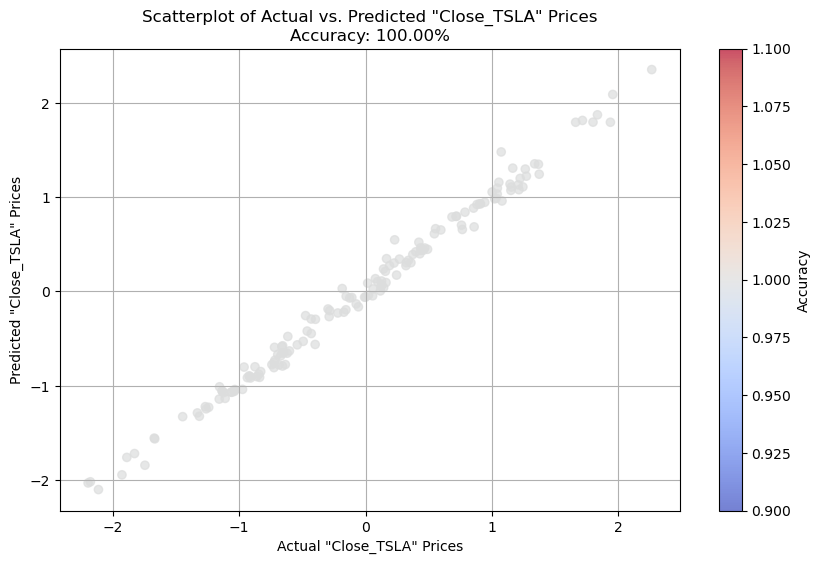

In [95]:
# absolute error
error = np.abs(y_stand_test - y_pred)

# Set a threshold to define prediction accuracy
threshold = 5  
accurate_predictions = (error <= threshold).astype(int)

# percentage of accuracy
accuracy_percentage = (np.sum(accurate_predictions) / len(accurate_predictions)) * 100

# scatterplot of predicted vs. actual
plt.figure(figsize=(10, 6))
plt.scatter(y_stand_test, y_pred, c=accurate_predictions, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Accuracy')
plt.xlabel('Actual "Close_TSLA" Prices')
plt.ylabel('Predicted "Close_TSLA" Prices')
plt.title(f'Scatterplot of Actual vs. Predicted "Close_TSLA" Prices\nAccuracy: {accuracy_percentage:.2f}%')
plt.grid(True)

plt.show()


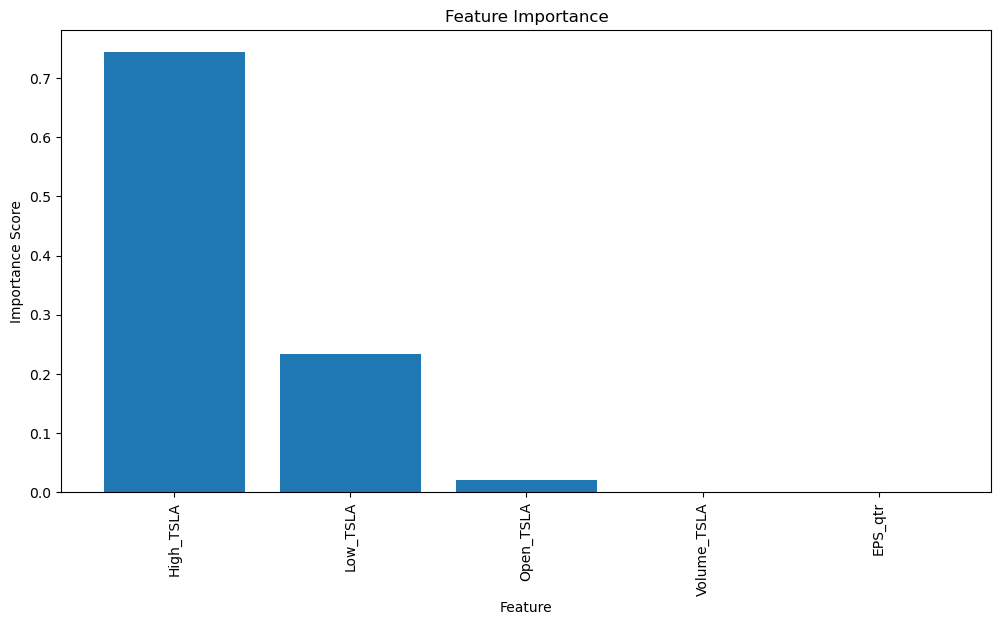

In [96]:
# Feature importance plot
FI = rf.feature_importances_
feature_names = X_stand.columns
plt.figure(figsize=(12, 6))
sorted_idx = np.argsort(FI)[::-1]
plt.bar(range(X_stand.shape[1]), FI[sorted_idx], align="center")
plt.xticks(range(X_stand.shape[1]), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()